# Data Wrangling Project: Mental Health

## Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import datetime

## Reading in boundary data for New York City, NY 

In [2]:
newyorkborough = gpd.read_file('geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
newyorkborough
newyorkborough = newyorkborough.astype({'boro_code':'int64'})
newyorkborough

boro_code      boro_name    shape_area     shape_leng   
0          5  Staten Island  1.623621e+09  325917.353702  \
1          2          Bronx  1.187175e+09  463179.772813   
2          1      Manhattan  6.365208e+08  357564.316391   
3          3       Brooklyn  1.934143e+09  728197.541089   
4          4         Queens  3.041419e+09  888199.731579   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

## Reading in FACETS data for New York City, NY

In [3]:
facets_ = pd.read_csv('MASTER_FACETS_DATA_AllColumns.csv')
display(facets_.head())

facets_.shape

FIPS  Year  Urban  Total_Population  P_WH  P_AA  P_AI  P_AS  P_NH   
0  36005000100  2016    1.0              8430  0.14  0.58   0.0  0.02   0.0  \
1  36005000200  2016    1.0              5095  0.32  0.28   0.0  0.06   0.0   
2  36005000400  2016    1.0              5572  0.30  0.36   0.0  0.01   0.0   
3  36005001600  2016    1.0              5412  0.34  0.33   0.0  0.00   0.0   
4  36005001900  2016    1.0              2569  0.32  0.32   0.0  0.02   0.0   

   P_OR  ...  Walkscore  Walkscore_Percentile  Tob_Retailer_Per_1000   
0  0.24  ...     0.0000                   0.0                    0.0  \
1  0.30  ...    -2.9096                   1.0                    0.0   
2  0.32  ...    -2.7511                   1.0                    1.0   
3  0.31  ...    -2.2716                   2.0                    1.0   
4  0.33  ...     0.2115                   3.0                    1.0   

   Felony_Per_1000    GINI  SVI_Themes_Total  SVI_Flags   
0             40.0     NaN            0.1104        3.0  \
1              8.0  0.4024            0.7719        1.0   
2             10.0  0.3659            0.6937        2.0   
3              9.0  0.4898            0.9451        2.0   
4             43.0  0.4420            0.9554        6.0   

   Housing_Violations_Per_1000  Voter Turnout  Turnout Quartile  
0                          NaN           0.19               1.0  
1                        135.0           0.19               1.0  
2                        145.0           0.19               1.0  
3                         31.0           0.20               1.0  
4                        178.0           0.19               1.0  

[5 rows x 49 columns]

(6501, 49)

116 FACETS census tracts were removed with the population of 0

In [4]:
facets = facets_.drop(facets_[(facets_.Total_Population == 0)].index) # Dropped 116 Census Tracts.
print(facets.shape)

#any0 = facets[(facets.Total_Population == 0)]
#print(any0)

facets

(6385, 49)


FIPS  Year  Urban  Total_Population  P_WH  P_AA   P_AI  P_AS   
0     36005000100  2016    1.0              8430  0.14  0.58  0.000  0.02  \
1     36005000200  2016    1.0              5095  0.32  0.28  0.000  0.06   
2     36005000400  2016    1.0              5572  0.30  0.36  0.000  0.01   
3     36005001600  2016    1.0              5412  0.34  0.33  0.000  0.00   
4     36005001900  2016    1.0              2569  0.32  0.32  0.000  0.02   
...           ...   ...    ...               ...   ...   ...    ...   ...   
6495  36085030301  2018    1.0              4897  0.59  0.13  0.000  0.19   
6496  36085030302  2018    1.0              6142  0.54  0.19  0.000  0.14   
6497  36085031901  2018    1.0              2564  0.25  0.61  0.000  0.07   
6498  36085031902  2018    1.0              4480  0.30  0.61  0.009  0.01   
6499  36085032300  2018    1.0              1218  0.41  0.45  0.001  0.00   

      P_NH  P_OR  ...  Walkscore  Walkscore_Percentile  Tob_Retailer_Per_1000   
0      0.0  0.24  ...     0.0000                   0.0                    0.0  \
1      0.0  0.30  ...    -2.9096                   1.0                    0.0   
2      0.0  0.32  ...    -2.7511                   1.0                    1.0   
3      0.0  0.31  ...    -2.2716                   2.0                    1.0   
4      0.0  0.33  ...     0.2115                   3.0                    1.0   
...    ...   ...  ...        ...                   ...                    ...   
6495   0.0  0.06  ...    -2.3185                   1.0                    1.0   
6496   0.0  0.08  ...    -1.8722                   2.0                    2.0   
6497   0.0  0.07  ...    -2.2547                   2.0                    0.0   
6498   0.0  0.05  ...    -3.8478                   1.0                    1.0   
6499   0.0  0.13  ...        NaN                   NaN                    3.0   

      Felony_Per_1000    GINI  SVI_Themes_Total  SVI_Flags   
0                40.0     NaN            0.1104        3.0  \
1                 8.0  0.4024            0.7719        1.0   
2                10.0  0.3659            0.6937        2.0   
3                 9.0  0.4898            0.9451        2.0   
4                43.0  0.4420            0.9554        6.0   
...               ...     ...               ...        ...   
6495             17.0  0.4005            0.5165        0.0   
6496              9.0  0.4038            0.4670        0.0   
6497             35.0  0.5083            0.9086        4.0   
6498             15.0  0.5671            0.8321        2.0   
6499             77.0  0.5786            0.6060        1.0   

      Housing_Violations_Per_1000  Voter Turnout  Turnout Quartile  
0                             NaN           0.19               1.0  
1                        135.0000           0.19               1.0  
2                        145.0000           0.19               1.0  
3                         31.0000           0.20               1.0  
4                        178.0000           0.19               1.0  
...                           ...            ...               ...  
6495                       0.5237           0.30               4.0  
6496                       1.3825           0.30               4.0  
6497                       1.1520           0.30               4.0  
6498                      12.0023           0.30               4.0  
6499                       1.0683           0.30               4.0  

[6385 rows x 49 columns]

Creating new columns for the value of total felony and total housing violations by working the per 1000 equation backwards to solve for total felony and total housing violations (HV) in the FIPS location:

total felony/HV = (felonyorHV_per_1000/1000) * total population

In [5]:
facets['fel_one'] = facets['Felony_Per_1000'].div(1000).multiply(facets['Total_Population']) 
facets.head()
# (Total Felonies/Total Population) * 1000 = Felony Per 1000

facets['house_one'] = facets['Housing_Violations_Per_1000'].div(1000).multiply(facets['Total_Population']) 
# (Total Housing Violations/Total Population) * 1000 = Housing Violations Per 1000

print(facets.shape)
facets.head()

(6385, 51)


FIPS  Year  Urban  Total_Population  P_WH  P_AA  P_AI  P_AS  P_NH   
0  36005000100  2016    1.0              8430  0.14  0.58   0.0  0.02   0.0  \
1  36005000200  2016    1.0              5095  0.32  0.28   0.0  0.06   0.0   
2  36005000400  2016    1.0              5572  0.30  0.36   0.0  0.01   0.0   
3  36005001600  2016    1.0              5412  0.34  0.33   0.0  0.00   0.0   
4  36005001900  2016    1.0              2569  0.32  0.32   0.0  0.02   0.0   

   P_OR  ...  Tob_Retailer_Per_1000  Felony_Per_1000    GINI   
0  0.24  ...                    0.0             40.0     NaN  \
1  0.30  ...                    0.0              8.0  0.4024   
2  0.32  ...                    1.0             10.0  0.3659   
3  0.31  ...                    1.0              9.0  0.4898   
4  0.33  ...                    1.0             43.0  0.4420   

   SVI_Themes_Total  SVI_Flags  Housing_Violations_Per_1000  Voter Turnout   
0            0.1104        3.0                          NaN           0.19  \
1            0.7719        1.0                        135.0           0.19   
2            0.6937        2.0                        145.0           0.19   
3            0.9451        2.0                         31.0           0.20   
4            0.9554        6.0                        178.0           0.19   

   Turnout Quartile  fel_one  house_one  
0               1.0  337.200        NaN  
1               1.0   40.760    687.825  
2               1.0   55.720    807.940  
3               1.0   48.708    167.772  
4               1.0  110.467    457.282  

[5 rows x 51 columns]

Removing any addition symbols and commas from the median household income variable. All 250,000+ values will be considered 250,000.

In [6]:
facets[facets.MED_HH_Income == "250,000+"]
facets.loc[facets.MED_HH_Income == "250,000+", "MED_HH_Income"]="250000"
facets[facets.MED_HH_Income == "250000"]

facets["MED_HH_Income"] = facets.MED_HH_Income.astype(str).astype(float)
#print(facets.dtypes)

Adding the county and city names for each FIPS location using their county FIPS identifiers.

In [7]:

county_dict = {'Bronx County':36005,'Kings County': 36047, 
               'New York County': 36061, 'Queens County':36081, 'Richmond County': 36085 }
County_df = pd.DataFrame.from_dict(county_dict,orient='index',columns=["FIPS_code"])
county = ['Bronx County','Kings County', 'New York County', 'Queens County', 'Richmond County']
city = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
boro_code = ['2','3','1','4','5']
County_df['County'] = county
County_df['City'] = city
County_df['boro_code'] = boro_code
County_df.head()

fips_list = facets['FIPS'].tolist()
#fips_list
fips_str = map(str,fips_list)
fips_str_list = list(fips_str)

def five_digits(num):
    return int(str(num[:5]))

fips_result = [five_digits(n) for n in fips_str_list]
#print(fips_result)

facets['FIPS_code'] = fips_result
facets_county = facets.merge(County_df, on=['FIPS_code'])
facets_county

FIPS  Year  Urban  Total_Population  P_WH  P_AA   P_AI  P_AS   
0     36005000100  2016    1.0              8430  0.14  0.58  0.000  0.02  \
1     36005000200  2016    1.0              5095  0.32  0.28  0.000  0.06   
2     36005000400  2016    1.0              5572  0.30  0.36  0.000  0.01   
3     36005001600  2016    1.0              5412  0.34  0.33  0.000  0.00   
4     36005001900  2016    1.0              2569  0.32  0.32  0.000  0.02   
...           ...   ...    ...               ...   ...   ...    ...   ...   
6380  36085030301  2018    1.0              4897  0.59  0.13  0.000  0.19   
6381  36085030302  2018    1.0              6142  0.54  0.19  0.000  0.14   
6382  36085031901  2018    1.0              2564  0.25  0.61  0.000  0.07   
6383  36085031902  2018    1.0              4480  0.30  0.61  0.009  0.01   
6384  36085032300  2018    1.0              1218  0.41  0.45  0.001  0.00   

      P_NH  P_OR  ...  SVI_Flags  Housing_Violations_Per_1000  Voter Turnout   
0      0.0  0.24  ...        3.0                          NaN           0.19  \
1      0.0  0.30  ...        1.0                     135.0000           0.19   
2      0.0  0.32  ...        2.0                     145.0000           0.19   
3      0.0  0.31  ...        2.0                      31.0000           0.20   
4      0.0  0.33  ...        6.0                     178.0000           0.19   
...    ...   ...  ...        ...                          ...            ...   
6380   0.0  0.06  ...        0.0                       0.5237           0.30   
6381   0.0  0.08  ...        0.0                       1.3825           0.30   
6382   0.0  0.07  ...        4.0                       1.1520           0.30   
6383   0.0  0.05  ...        2.0                      12.0023           0.30   
6384   0.0  0.13  ...        1.0                       1.0683           0.30   

      Turnout Quartile  fel_one   house_one  FIPS_code           County   
0                  1.0  337.200         NaN      36005     Bronx County  \
1                  1.0   40.760  687.825000      36005     Bronx County   
2                  1.0   55.720  807.940000      36005     Bronx County   
3                  1.0   48.708  167.772000      36005     Bronx County   
4                  1.0  110.467  457.282000      36005     Bronx County   
...                ...      ...         ...        ...              ...   
6380               4.0   83.249    2.564559      36085  Richmond County   
6381               4.0   55.278    8.491315      36085  Richmond County   
6382               4.0   89.740    2.953728      36085  Richmond County   
6383               4.0   67.200   53.770304      36085  Richmond County   
6384               4.0   93.786    1.301189      36085  Richmond County   

               City  boro_code  
0             Bronx          2  
1             Bronx          2  
2             Bronx          2  
3             Bronx          2  
4             Bronx          2  
...             ...        ...  
6380  Staten Island          5  
6381  Staten Island          5  
6382  Staten Island          5  
6383  Staten Island          5  
6384  Staten Island          5  

[6385 rows x 55 columns]

Obtaining a copy of the dataframe for my specific factor, Mental Health, with the applicable variables. Assessing the variable types.

In [8]:
mental_health = facets_county.iloc[:,[0,1,3,24,25,42,43,46,49,50,53,54]].copy()

datatypes = mental_health.dtypes
#print(datatypes)
mental_health["boro_code"] = mental_health.boro_code.astype(str).astype('int64')
print(datatypes)

mental_health.shape

FIPS                             int64
Year                             int64
Total_Population                 int64
Poverty_Rate                   float64
MED_HH_Income                  float64
Felony_Per_1000                float64
GINI                           float64
Housing_Violations_Per_1000    float64
fel_one                        float64
house_one                      float64
City                            object
boro_code                       object
dtype: object


(6385, 12)

Performing descriptive statistics using the describe function. We can see that many of the variables have a positive skew based on the mean and median values alone: total population, poverty rate, and median house hold income. Felony per 1000 and Housing Violations have a very strong positive skew. GINI is the only variable that appears to be normally distributed.

In [9]:
mental_health[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000", "fel_one", "house_one" ]].describe()

Total_Population  Poverty_Rate  MED_HH_Income  Felony_Per_1000   
count       6385.000000   6375.000000    6316.000000      6369.000000  \
mean        3953.577604      0.195319   59678.697277        51.833726   
std         2196.715908      0.131834   29392.449593       550.735166   
min            1.000000      0.000000    9327.000000         0.000000   
25%         2423.000000      0.090000   39468.000000         9.000000   
50%         3590.000000      0.170000   55181.500000        17.000000   
75%         4995.000000      0.270000   74099.500000        43.000000   
max        29256.000000      1.000000  250000.000000     41000.000000   

              GINI  Housing_Violations_Per_1000      fel_one     house_one  
count  6337.000000                  5727.000000  6369.000000   5727.000000  
mean      0.453825                    71.756139   167.308531    310.877803  
std       0.064689                   178.954187   346.809485   1349.662185  
min       0.125100                     0.000000     0.000000      0.000000  
25%       0.409600                     0.102200    28.728000      0.311109  
50%       0.449000                     0.420500    60.576000      1.776262  
75%       0.491000                    40.000000   144.274000    129.908500  
max       0.690500                  2714.000000  9661.284000  78236.478000

Assessing the occurrence of Null values over the whole dataset, then by year.

In [10]:
null_mental = mental_health.isnull().sum()
print(null_mental)

len(mental_health.index) # Highest Null values is at 10% (Housing_Violations_Per_1000), no variables need to be removed.

FIPS                             0
Year                             0
Total_Population                 0
Poverty_Rate                    10
MED_HH_Income                   69
Felony_Per_1000                 16
GINI                            48
Housing_Violations_Per_1000    658
fel_one                         16
house_one                      658
City                             0
boro_code                        0
dtype: int64


6385

In [11]:
year16 = mental_health[mental_health.Year == 2016]
year16.isnull().sum()

FIPS                             0
Year                             0
Total_Population                 0
Poverty_Rate                     4
MED_HH_Income                   19
Felony_Per_1000                 14
GINI                            18
Housing_Violations_Per_1000    532
fel_one                         14
house_one                      532
City                             0
boro_code                        0
dtype: int64

In [12]:
year17 = mental_health[mental_health.Year == 2017]
year17.isnull().sum()

FIPS                            0
Year                            0
Total_Population                0
Poverty_Rate                    3
MED_HH_Income                  25
Felony_Per_1000                 2
GINI                           15
Housing_Violations_Per_1000    63
fel_one                         2
house_one                      63
City                            0
boro_code                       0
dtype: int64

In [13]:
year18 = mental_health[mental_health.Year == 2018]
year18.isnull().sum()

FIPS                            0
Year                            0
Total_Population                0
Poverty_Rate                    3
MED_HH_Income                  25
Felony_Per_1000                 0
GINI                           15
Housing_Violations_Per_1000    63
fel_one                         0
house_one                      63
City                            0
boro_code                       0
dtype: int64

## FIPS

Assessing the FIPS locations and if they have recordings for each year. Removed those missing recordings for each year.

In [14]:
fips_occ = pd.DataFrame(mental_health['FIPS'].value_counts())
fips_occ

fips_occ.value_counts()

fips_occ.tail(5)

count
FIPS              
36005002400      2
36061021703      2
36005016300      1
36081038302      1
36005017100      1

In [15]:
fp = mental_health[(mental_health.FIPS == 36005002400) | (mental_health.FIPS == 36061021703) |
                        (mental_health.FIPS == 36005016300) | (mental_health.FIPS == 36081038302) | (mental_health.FIPS == 36005017100)]
display(fp)

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
96    36005016300  2016                77          0.57            NaN  \
102   36005017100  2016                 1          0.00            NaN   
344   36005002400  2017               150          0.00            NaN   
680   36005002400  2018               123          0.00            NaN   
3764  36061021703  2017                 8          0.00            NaN   
4047  36061021703  2018                 8          0.00            NaN   
4358  36081038302  2016                44           NaN            NaN   

      Felony_Per_1000  GINI  Housing_Violations_Per_1000  fel_one  house_one   
96              571.0   NaN                          NaN   43.967        NaN  \
102               NaN   NaN                          NaN      NaN        NaN   
344               1.0   NaN                          NaN    0.150        NaN   
680              24.0   NaN                          NaN    2.952        NaN   
3764             80.0   NaN                          0.0    0.640        0.0   
4047          11125.0   NaN                          0.0   89.000        0.0   
4358              NaN   NaN                          NaN      NaN        NaN   

           City  boro_code  
96        Bronx          2  
102       Bronx          2  
344       Bronx          2  
680       Bronx          2  
3764  Manhattan          1  
4047  Manhattan          1  
4358     Queens          4

In [16]:
fips_pop = mental_health[(mental_health.FIPS == 36005002400) | (mental_health.FIPS == 36061021703) |
                        (mental_health.FIPS == 36005016300) | (mental_health.FIPS == 36081038302) | (mental_health.FIPS == 36005017100)].index

mental_health.drop(fips_pop, inplace=True)

## Total Population

Assessing the normality of total population since it is needed for evaluating felony per 1000 and housing per 1000. Has a positive skew.

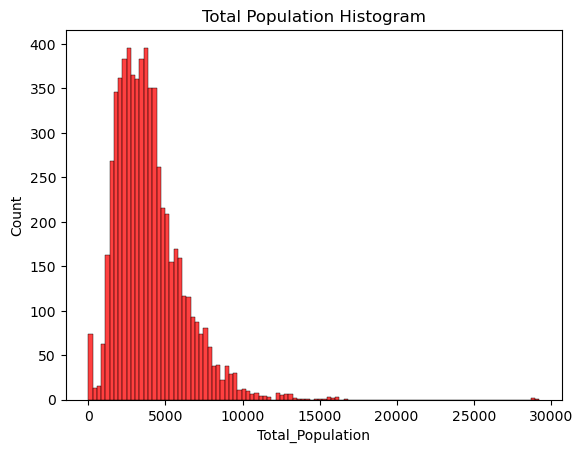

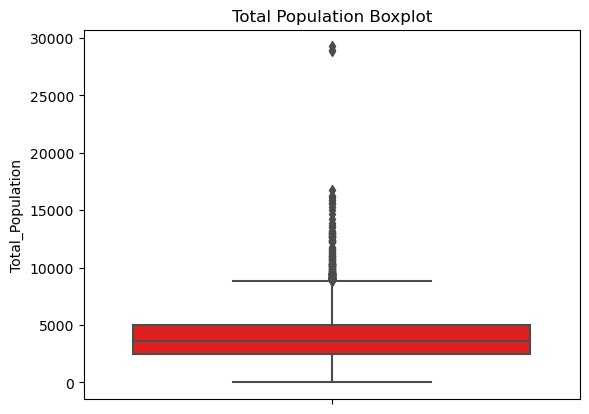

In [17]:
totalpopulation_hist = sns.histplot(data=mental_health,x='Total_Population', color='red').set(title="Total Population Histogram")
plt.show()

totalpopulation_box = sns.boxplot(data=mental_health,y='Total_Population', color='red').set(title="Total Population Boxplot")
plt.show()

Assessing the outliers noticed in the boxplot. All of them are consistent between the years. I believe this to be true values and not an error. Leaving values as is.

In [18]:
pd.options.mode.chained_assignment = None 

pop_pop = mental_health[(mental_health.Total_Population >=14800)].sort_values(['FIPS'])
pop_pop

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
332   36005046201  2016             28827          0.08        44856.0  \
668   36005046201  2017             28926          0.07        43205.0   
1004  36005046201  2018             29256          0.07        45770.0   
3304  36061004400  2016             16735          0.12        92267.0   
3586  36061004400  2017             16200          0.13        93010.0   
3869  36061004400  2018             16039          0.10        94000.0   
3395  36061013600  2016             15641          0.04       107343.0   
3677  36061013600  2017             15880          0.03       108587.0   
3960  36061013600  2018             15234          0.04       101554.0   
3416  36061015400  2016             14969          0.08        83767.0   
3981  36061015400  2018             15502          0.07        82026.0   
3512  36061024500  2016             15899          0.32        34564.0   
3795  36061024500  2017             16231          0.31        35394.0   
4078  36061024500  2018             15642          0.29        38321.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000   fel_one   
332              10.0  0.4250                    2714.0000   288.270  \
668             334.0  0.4348                       0.3077  9661.284   
1004             12.0  0.4348                       0.3077   351.072   
3304              2.0  0.4407                       1.0000    33.470   
3586             54.0  0.4449                       0.0241   874.800   
3869              3.0  0.4449                       0.0241    48.117   
3395              4.0  0.5686                      69.0000    62.564   
3677            109.0  0.5569                       0.7484  1730.920   
3960              6.0  0.5569                       0.7484    91.404   
3416              5.0  0.4782                      66.0000    74.845   
3981              7.0  0.4687                       0.6481   108.514   
3512              9.0  0.4199                     952.0000   143.091   
3795            259.0  0.4245                       7.0808  4203.829   
4078             13.0  0.4245                       7.0808   203.346   

         house_one       City  boro_code  
332   78236.478000      Bronx          2  
668       8.900530      Bronx          2  
1004      9.002071      Bronx          2  
3304     16.735000  Manhattan          1  
3586      0.390420  Manhattan          1  
3869      0.386540  Manhattan          1  
3395   1079.229000  Manhattan          1  
3677     11.884592  Manhattan          1  
3960     11.401126  Manhattan          1  
3416    987.954000  Manhattan          1  
3981     10.046846  Manhattan          1  
3512  15135.848000  Manhattan          1  
3795    114.928465  Manhattan          1  
4078    110.757874  Manhattan          1

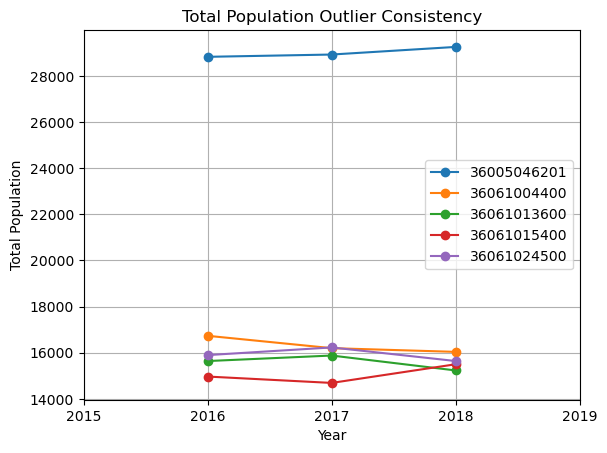

In [19]:
concern_tpop = set(pop_pop['FIPS'])
#print(concern_tpop)

#ctp = list(pop_pop['FIPS'])
#ctp

out_tpop = mental_health['FIPS'].isin(concern_tpop)
consistency_tpop = mental_health[out_tpop]

consistency_tpop['Year'] = pd.to_datetime(consistency_tpop['Year'], format='%Y')
consistency_tpop.set_index('Year',inplace=True)

consistency_tpop.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True)
plt.title('Total Population Outlier Consistency')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_tpop
plt.show()

## Poverty Rate

Assessing Poverty Rate for outliers and distribution. There is a positive skew on the data and there are some outliers. They are consistent between the years and do not indicate transcription errors.

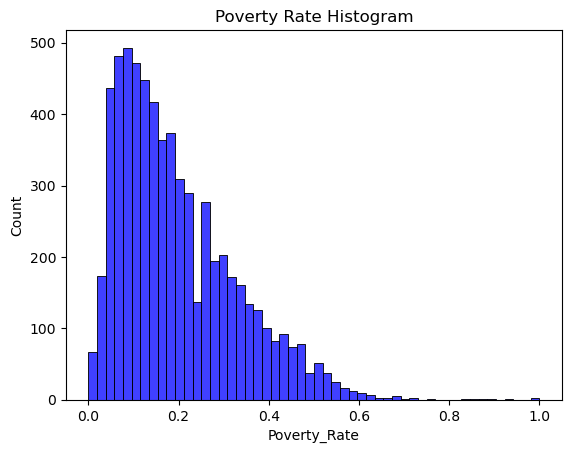

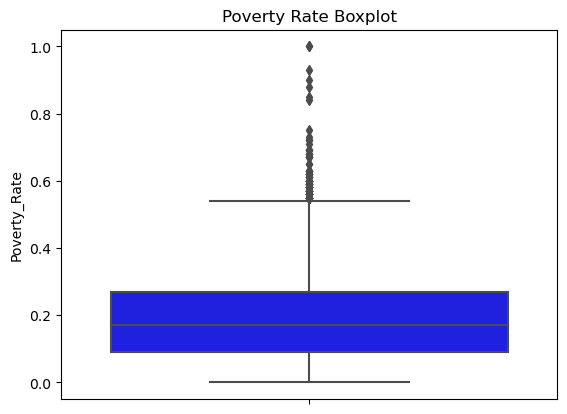

In [20]:
povertyrate_hist  = sns.histplot(data=mental_health, x='Poverty_Rate', color='blue').set(title="Poverty Rate Histogram")
plt.show()

povertyrate_box  = sns.boxplot(data=mental_health, y='Poverty_Rate', color='blue').set(title="Poverty Rate Boxplot")
plt.show()

In [21]:
pov_pop = mental_health[(mental_health.Poverty_Rate >=0.8)].sort_values(['FIPS'])
pov_pop

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
225   36005031900  2016               647          0.93            NaN  \
561   36005031900  2017               645          0.84            NaN   
3401  36061014300  2016                 4          1.00            NaN   
3683  36061014300  2017                 5          1.00            NaN   
3507  36061024000  2016              1580          0.85            NaN   
3790  36061024000  2017              1688          0.88            NaN   
4073  36061024000  2018              1742          0.90            NaN   

      Felony_Per_1000  GINI  Housing_Violations_Per_1000  fel_one  house_one   
225               6.0   NaN                          NaN    3.882        NaN  \
561               8.0   NaN                       0.0000    5.160   0.000000   
3401              NaN   NaN                          NaN      NaN        NaN   
3683            230.0   NaN                          NaN    1.150        NaN   
3507             44.0   NaN                          NaN   69.520        NaN   
3790            155.0   NaN                       0.0037  261.640   0.006246   
4073             52.0   NaN                       0.0037   90.584   0.006445   

           City  boro_code  
225       Bronx          2  
561       Bronx          2  
3401  Manhattan          1  
3683  Manhattan          1  
3507  Manhattan          1  
3790  Manhattan          1  
4073  Manhattan          1

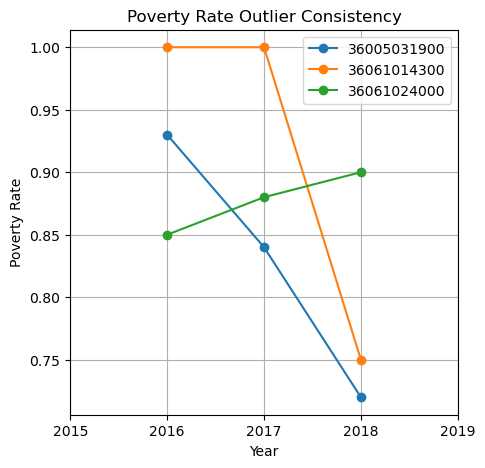

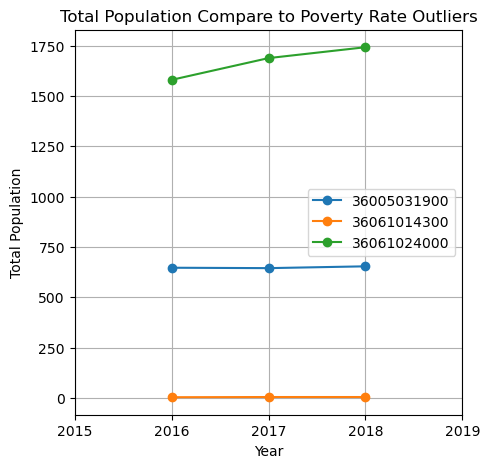

In [22]:
concern_pov = set(pov_pop['FIPS'])
#print(concern_pov)

#cpv = list(pov_pop['FIPS'])
#cpv

out_pov = mental_health['FIPS'].isin(concern_pov)
consistency_pov = mental_health[out_pov]

consistency_pov['Year'] = pd.to_datetime(consistency_pov['Year'], format='%Y')
consistency_pov.set_index('Year',inplace=True)


consistency_pov.groupby('FIPS')['Poverty_Rate'].plot(legend=True,marker='o',grid=True, figsize=(5,5))
plt.title('Poverty Rate Outlier Consistency')
plt.ylabel('Poverty Rate')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_pov
plt.show()

consistency_pov.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True, figsize=(5,5))
plt.title('Total Population Compare to Poverty Rate Outliers')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

In [23]:
mental_health.loc[(mental_health['FIPS'] == 36061014300) | (mental_health['FIPS'] == 36005031900)]

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
225   36005031900  2016               647          0.93            NaN  \
561   36005031900  2017               645          0.84            NaN   
897   36005031900  2018               654          0.72            NaN   
3401  36061014300  2016                 4          1.00            NaN   
3683  36061014300  2017                 5          1.00            NaN   
3966  36061014300  2018                 5          0.75            NaN   

      Felony_Per_1000  GINI  Housing_Violations_Per_1000  fel_one  house_one   
225               6.0   NaN                          NaN    3.882        NaN  \
561               8.0   NaN                          0.0    5.160        0.0   
897               8.0   NaN                          0.0    5.232        0.0   
3401              NaN   NaN                          NaN      NaN        NaN   
3683            230.0   NaN                          NaN    1.150        NaN   
3966          41000.0   NaN                          NaN  205.000        NaN   

           City  boro_code  
225       Bronx          2  
561       Bronx          2  
897       Bronx          2  
3401  Manhattan          1  
3683  Manhattan          1  
3966  Manhattan          1

In [24]:
mental_health['Poverty_Rate'] = mental_health['Poverty_Rate'].fillna(mental_health['Poverty_Rate'].median())

## Median Household Income

Assessing median household income. There is a slight positive skew and several outliers. The outliers are consistent between the years and don't indicate to being a data entry error.

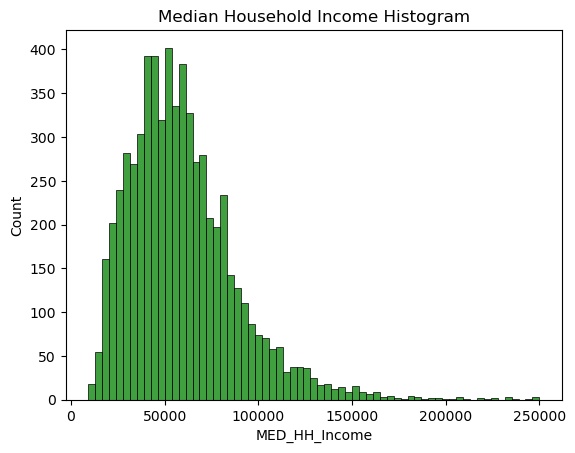

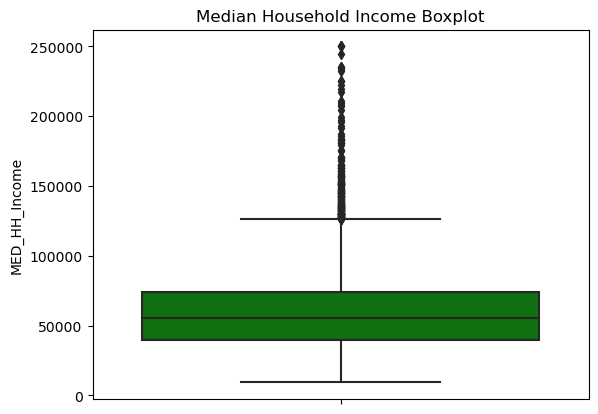

In [25]:
medhh_hist = sns.histplot(data=mental_health,x='MED_HH_Income', color='green').set(title="Median Household Income Histogram")
plt.show()

medhh_box = sns.boxplot(data=mental_health,y='MED_HH_Income', color='green').set(title="Median Household Income Boxplot")
plt.show()

In [26]:
inc_pop = mental_health[(mental_health.MED_HH_Income >=200000)].sort_values(['FIPS'])
inc_pop

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
1021  36047002100  2016              3798          0.07       204205.0  \
1772  36047002100  2017              4295          0.08       208036.0   
2523  36047002100  2018              4628          0.07       211071.0   
3844  36061002100  2018              6488          0.03       250000.0   
3561  36061002100  2017              6735          0.03       250000.0   
3279  36061002100  2016              6506          0.02       232266.0   
3575  36061003300  2017              5005          0.04       250000.0   
3858  36061003300  2018              5030          0.05       207460.0   
3293  36061003300  2016              5262          0.06       219554.0   
3892  36061006900  2018              2442          0.06       209167.0   
3369  36061011201  2016               843          0.03       225250.0   
3389  36061013000  2016              3693          0.08       217070.0   
3671  36061013000  2017              3277          0.07       244375.0   
3400  36061014200  2016              4288          0.08       225208.0   
3965  36061014200  2018              4186          0.05       235083.0   
3682  36061014200  2017              4467          0.06       235455.0   
3706  36061016001  2017              3861          0.02       222222.0   
3989  36061016001  2018              3918          0.02       233529.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000   fel_one   
1021             27.0  0.3995                          NaN   102.546  \
1772            165.0  0.3931                       0.0115   708.675   
2523             35.0  0.3931                       0.0115   161.980   
3844             23.0  0.5001                       0.0464   149.224   
3561            174.0  0.5001                       0.0464  1171.890   
3279             18.0  0.5101                      44.0000   117.108   
3575            226.0  0.5818                       0.0241  1131.130   
3858             35.0  0.5818                       0.0241   176.050   
3293             26.0  0.5863                      13.0000   136.812   
3892             43.0  0.5195                       0.0371   105.006   
3369            262.0  0.4655                      41.0000   220.866   
3389              9.0  0.5847                      60.0000    33.237   
3671             51.0  0.5668                       0.0687   167.127   
3400              6.0  0.6038                      12.0000    25.728   
3965              8.0  0.6043                       0.0891    33.488   
3682             55.0  0.6043                       0.0891   245.685   
3706             19.0  0.5450                       0.0353    73.359   
3989              4.0  0.5450                       0.0353    15.672   

       house_one       City  boro_code  
1021         NaN   Brooklyn          3  
1772    0.049392   Brooklyn          3  
2523    0.053222   Brooklyn          3  
3844    0.301043  Manhattan          1  
3561    0.312504  Manhattan          1  
3279  286.264000  Manhattan          1  
3575    0.120620  Manhattan          1  
3858    0.121223  Manhattan          1  
3293   68.406000  Manhattan          1  
3892    0.090598  Manhattan          1  
3369   34.563000  Manhattan          1  
3389  221.580000  Manhattan          1  
3671    0.225130  Manhattan          1  
3400   51.456000  Manhattan          1  
3965    0.372973  Manhattan          1  
3682    0.398010  Manhattan          1  
3706    0.136293  Manhattan          1  
3989    0.138305  Manhattan          1

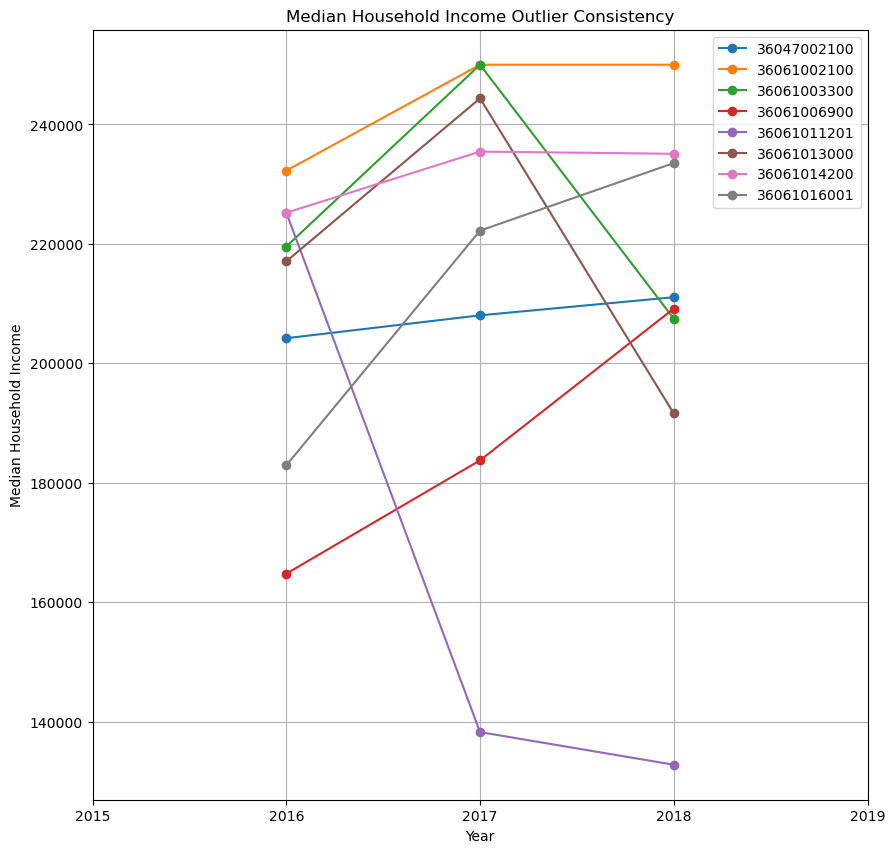

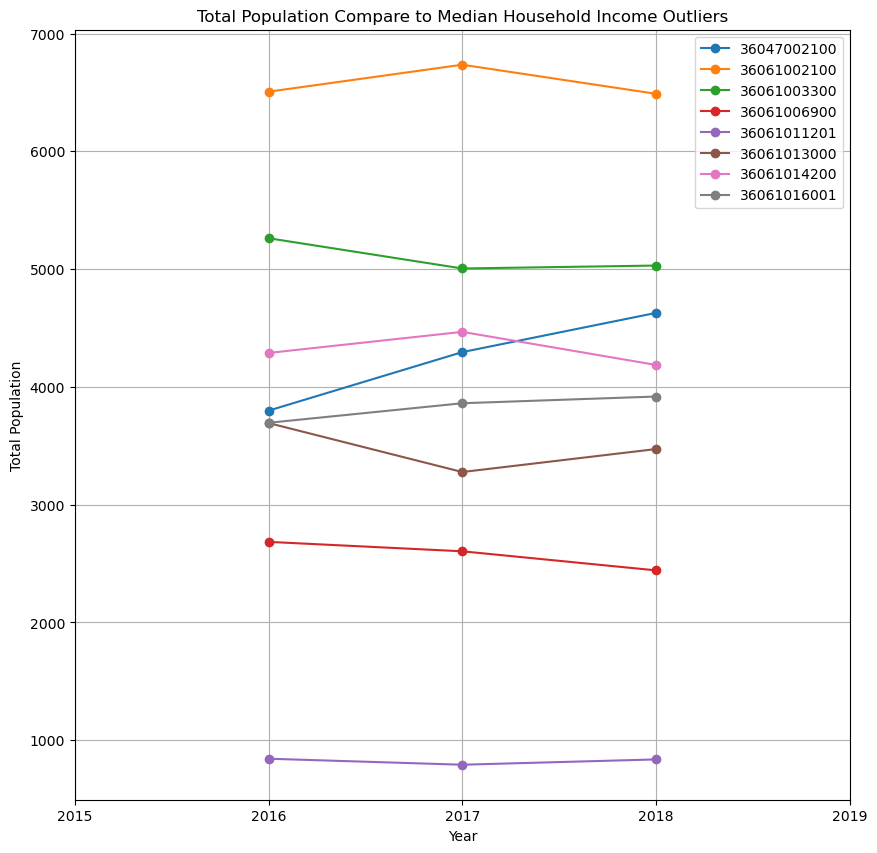

In [27]:
concern_inc = set(inc_pop['FIPS'])
#print(concern_inc)

#cinc = list(inc_pop['FIPS'])
#cinc

out_inc = mental_health['FIPS'].isin(concern_inc)
consistency_inc = mental_health[out_inc]

consistency_inc['Year'] = pd.to_datetime(consistency_inc['Year'], format='%Y')
consistency_inc.set_index('Year',inplace=True)

consistency_inc.groupby('FIPS')['MED_HH_Income'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Median Household Income Outlier Consistency')
plt.ylabel('Median Household Income')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_inc
plt.show()

consistency_inc.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Total Population Compare to Median Household Income Outliers')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

In [28]:
mental_health.loc[mental_health['FIPS'] == 36061011201]

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
3369  36061011201  2016               843          0.03       225250.0  \
3651  36061011201  2017               792          0.07       138250.0   
3934  36061011201  2018               837          0.07       132788.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
3369            262.0  0.4655                         41.0  220.866  \
3651            232.0  0.5330                          0.0  183.744   
3934            287.0  0.5330                          0.0  240.219   

      house_one       City  boro_code  
3369     34.563  Manhattan          1  
3651      0.000  Manhattan          1  
3934      0.000  Manhattan          1

In [29]:
mental_health['MED_HH_Income'] = mental_health['MED_HH_Income'].fillna(mental_health['MED_HH_Income'].median())

## Felonies Per 1000

Assesesing felony per 1000. There are several outliers and it has a significant positive skew. Eight values were changed to NaN and replaced with the median value along with the original NaN values.

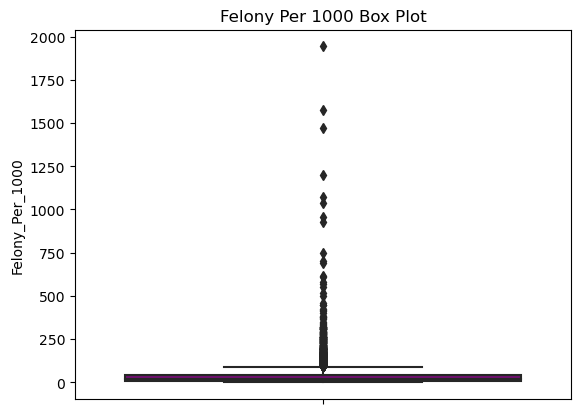

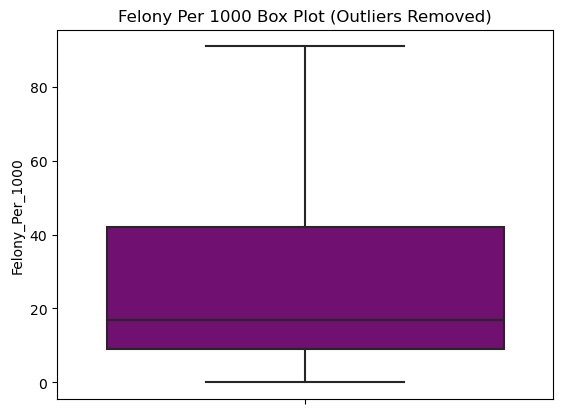

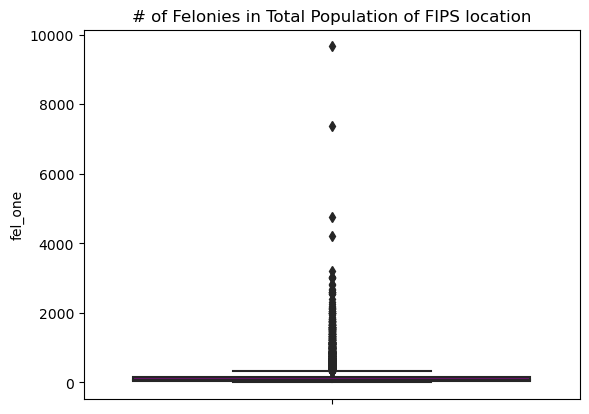

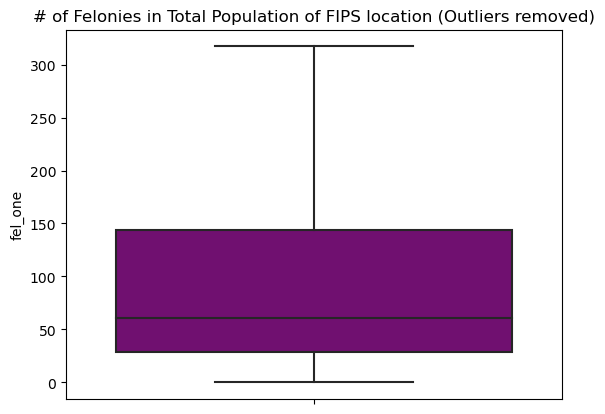

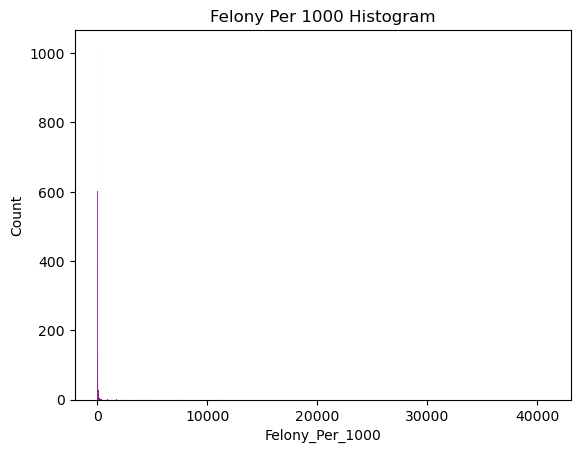

In [81]:
felony_box = sns.boxplot(data=mental_health, y='Felony_Per_1000', color='purple').set(title="Felony Per 1000 Box Plot")
plt.show()

felony_box_out = sns.boxplot(data=mental_health, y='Felony_Per_1000', showfliers=False, color='purple').set(title="Felony Per 1000 Box Plot (Outliers Removed)")
plt.show()

fel_box = sns.boxplot(data=facets, y='fel_one', color='purple').set(title="# of Felonies in Total Population of FIPS location")
plt.show()

fel_boxs = sns.boxplot(data=facets, y='fel_one',showfliers=False, color='purple').set(title="# of Felonies in Total Population of FIPS location (Outliers removed)")
plt.show()

mental_health['Felony_Per_1000'] = mental_health['Felony_Per_1000'].fillna(mental_health['Felony_Per_1000'].median())


In [31]:
pop_fel = mental_health[(mental_health.fel_one >=10) & (mental_health.Total_Population <=800)]
pop_fel.sort_values(['FIPS'])

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
14    36005003700  2016               199          0.50         9327.0  \
688   36005003700  2018               279          0.39        55181.5   
736   36005011000  2018               151          0.21        55181.5   
199   36005027600  2016                62          0.11        54167.0   
871   36005027600  2018                59          0.14        60000.0   
204   36005028400  2016               707          0.27        96094.0   
540   36005028400  2017               740          0.24        55181.5   
876   36005028400  2018               687          0.29        98482.0   
320   36005043500  2016                55          0.00        20417.0   
992   36005043500  2018                62          0.13        55181.5   
335   36005050400  2016                54          0.00        29844.0   
1007  36005050400  2018                65          0.00        55181.5   
1016  36047001100  2016               701          0.09       103500.0   
2743  36047028501  2018               432          0.27        92308.0   
1992  36047028501  2017               293          0.12        84861.0   
1241  36047028501  2016               423          0.10        97083.0   
1393  36047045000  2016               507          0.31        78438.0   
2895  36047045000  2018               514          0.47        45938.0   
1469  36047054300  2016               347          0.11        81583.0   
2220  36047054300  2017               382          0.10        92500.0   
2971  36047054300  2018               351          0.01       119250.0   
3128  36047085200  2018                 8          0.00        55181.5   
3917  36061009400  2018                44          0.00       199167.0   
3919  36061009600  2018               119          0.11       136406.0   
3636  36061009600  2017               149          0.08       135313.0   
3354  36061009600  2016               147          0.08        91875.0   
3360  36061010200  2016               225          0.14       100500.0   
3642  36061010200  2017               258          0.08        55181.5   
3925  36061010200  2018               180          0.12       165083.0   
3931  36061010900  2018               147          0.15        55181.5   
3648  36061010900  2017               186          0.17       135750.0   
3366  36061010900  2016               220          0.18       132500.0   
3651  36061011201  2017               792          0.07       138250.0   
3935  36061011202  2018               257          0.05       187500.0   
3370  36061011202  2016               266          0.02       153594.0   
3652  36061011202  2017               287          0.05       192857.0   
3372  36061011300  2016               146          0.26        81786.0   
3937  36061011300  2018               120          0.23        90938.0   
3654  36061011300  2017               126          0.19        82361.0   
3966  36061014300  2018                 5          0.75        55181.5   
4027  36061019701  2018               749          0.40        68092.0   
4103  36061029700  2018                18          0.17        55181.5   
5571  36081021900  2018                 4          0.00        55181.5   
4376  36081042600  2016               500          0.65        55181.5   
5026  36081042600  2017               512          0.63        55181.5   
5676  36081042600  2018               507          0.67        55181.5   
5806  36081060701  2018                15          0.00        55181.5   
4534  36081064102  2016               134          0.00        20250.0   
5834  36081064102  2018               172          0.33        55181.5   
6029  36081138502  2018                37          0.49        55181.5   
6362  36085022800  2018                41          0.00        55181.5   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
14               70.0  0.4719                          NaN   13.930  \
688              82.0 

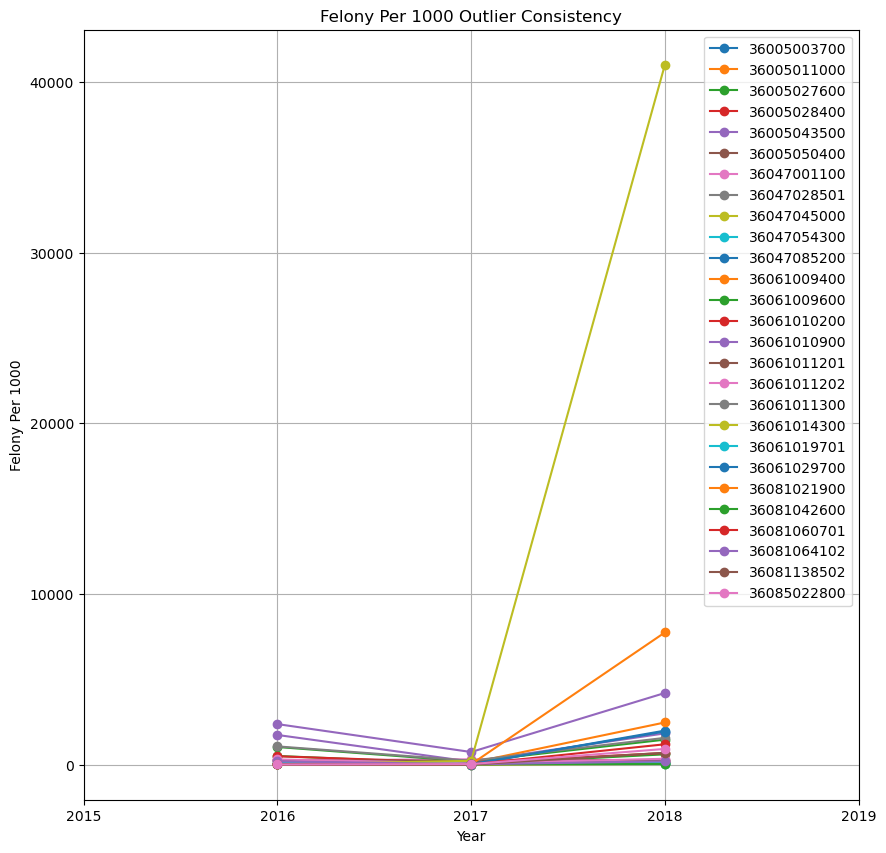

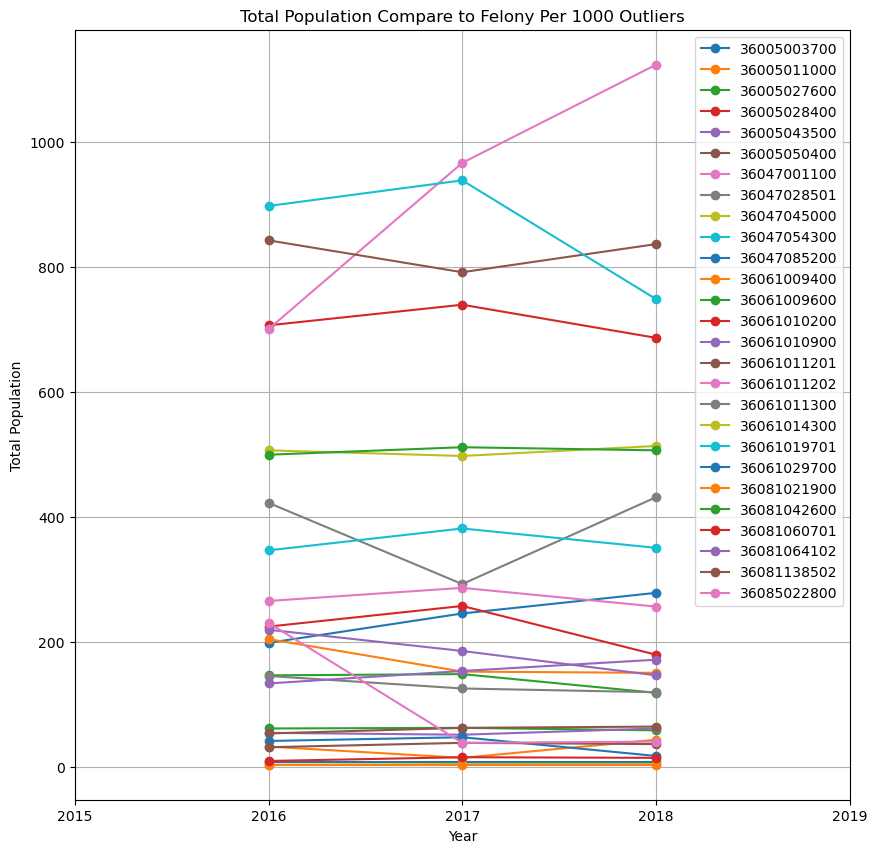

In [32]:
concern_fel = set(pop_fel['FIPS'])
#print(concern_fel)

#cfel = list(pop_fel['FIPS'])
#cfel

out_fel = mental_health['FIPS'].isin(concern_fel)
consistency_fel = mental_health[out_fel]

consistency_fel['Year'] = pd.to_datetime(consistency_fel['Year'], format='%Y')
consistency_fel.set_index('Year',inplace=True)


consistency_fel.groupby('FIPS')['Felony_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Felony Per 1000 Outlier Consistency')
plt.ylabel('Felony Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_fel
plt.show()

consistency_fel.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Total Population Compare to Felony Per 1000 Outliers')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

In [33]:
problems = mental_health[(mental_health.FIPS ==36005043500) | (mental_health.FIPS ==36047085200) |
                        (mental_health.FIPS ==36061010900) | (mental_health.FIPS ==36061009400) |
                        (mental_health.FIPS ==36061010900) | (mental_health.FIPS ==36061014300) | 
                         (mental_health.FIPS ==36081021900) ].sort_values('FIPS')
problems.iloc[:,[0,1,2,5,8]]

FIPS  Year  Total_Population  Felony_Per_1000  fel_one
320   36005043500  2016                55           1745.0   95.975
656   36005043500  2017                52            182.0    9.464
992   36005043500  2018                62           1839.0  114.018
1626  36047085200  2016                 8             17.0      NaN
2377  36047085200  2017                 8             12.0    0.096
3128  36047085200  2018                 8           2000.0   16.000
3352  36061009400  2016                33             17.0      NaN
3634  36061009400  2017                15            116.0    1.740
3917  36061009400  2018                44           2477.0  108.988
3366  36061010900  2016               220           2381.0  523.820
3648  36061010900  2017               186            746.0  138.756
3931  36061010900  2018               147           4204.0  617.988
3966  36061014300  2018                 5          41000.0  205.000
3401  36061014300  2016                 4             17.0      NaN
3683  36061014300  2017                 5            230.0    1.150
4921  36081021900  2017                 4             31.0    0.124
4270  36081021900  2016                 4             17.0      NaN
5571  36081021900  2018                 4           7750.0   31.000

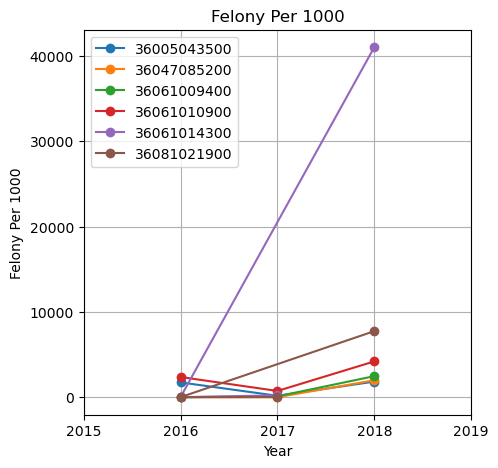

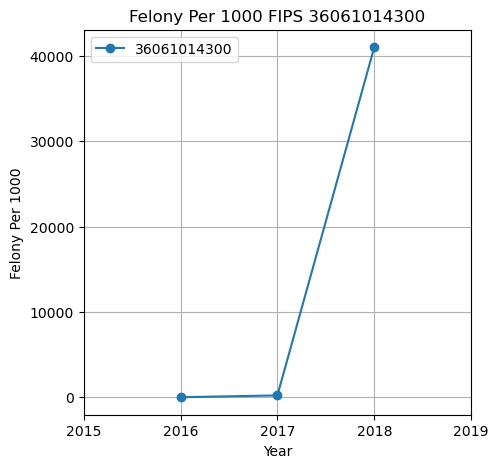

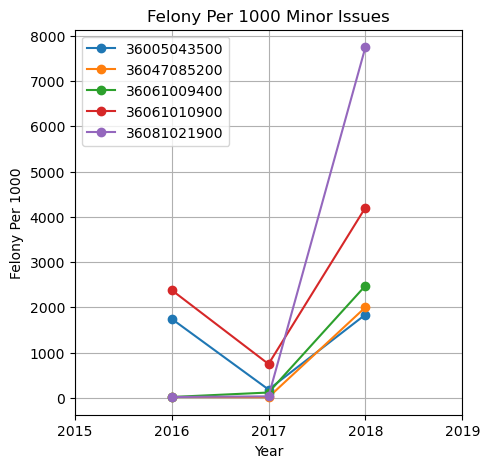

In [34]:
problems['Year'] = pd.to_datetime(problems['Year'], format='%Y')
problems.set_index('Year',inplace=True)

problems.groupby('FIPS')['Felony_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Felony Per 1000')
plt.ylabel('Felony Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()


major_problem =  mental_health[mental_health.FIPS == 36061014300]

major_problem['Year'] = pd.to_datetime(major_problem['Year'], format='%Y')
major_problem.set_index('Year',inplace=True)

major_problem.groupby('FIPS')['Felony_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Felony Per 1000 FIPS 36061014300')
plt.ylabel('Felony Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()


minor_problems =  mental_health[(mental_health.FIPS ==36005043500) | (mental_health.FIPS ==36047085200) |
                        (mental_health.FIPS ==36061010900) | (mental_health.FIPS ==36061009400) |
                        (mental_health.FIPS ==36061010900) | (mental_health.FIPS ==36081021900)]

minor_problems['Year'] = pd.to_datetime(minor_problems['Year'], format='%Y')
minor_problems.set_index('Year',inplace=True)                         

minor_problems.groupby('FIPS')['Felony_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Felony Per 1000 Minor Issues')
plt.ylabel('Felony Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

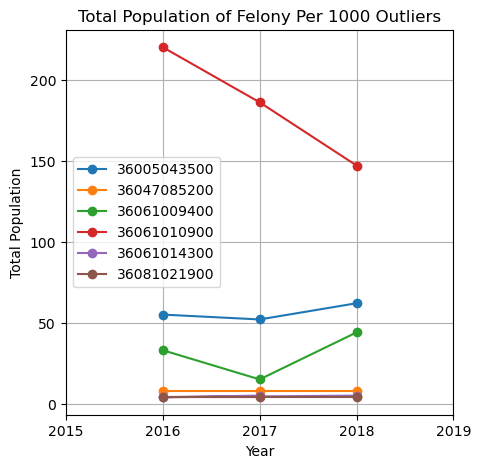

In [74]:
problems.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Total Population of Felony Per 1000 Outliers')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

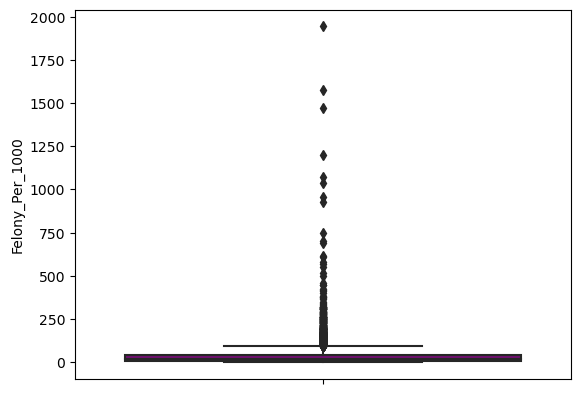

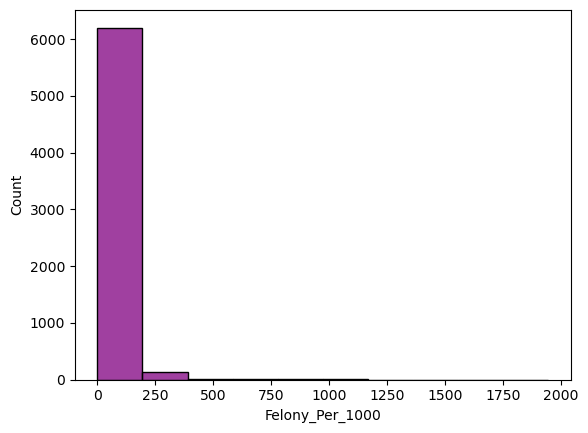

In [35]:
mental_health.at[320,'Felony_Per_1000']=np.nan #36005043500 2018 55/95
mental_health.at[992,'Felony_Per_1000']=np.nan #36005043500 2018 62/114
mental_health.at[3128,'Felony_Per_1000']=np.nan #36047085200 2018 8/16
mental_health.at[3366,'Felony_Per_1000']=np.nan #36061010900 2016 220/523
mental_health.at[3917,'Felony_Per_1000']=np.nan #36061009400 2018 44/108
mental_health.at[3931,'Felony_Per_1000']=np.nan #36061010900 2018 147/617
mental_health.at[3966,'Felony_Per_1000']=np.nan #36061014300 2015 5/205
mental_health.at[5571,'Felony_Per_1000']=np.nan #36081021900 2018 4/31


sns.boxplot(mental_health,y='Felony_Per_1000', color='purple')
plt.show()
sns.histplot(mental_health,x='Felony_Per_1000',bins=10, color='purple')
plt.show()

In [36]:
mental_health['Felony_Per_1000'] = mental_health['Felony_Per_1000'].fillna(mental_health['Felony_Per_1000'].median())

## GINI Index

GINI Index had a normal distribution with minimal outliers. The outliers are consistent through the years.

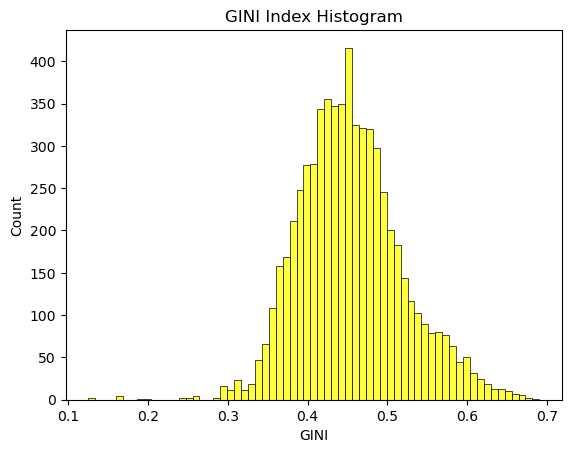

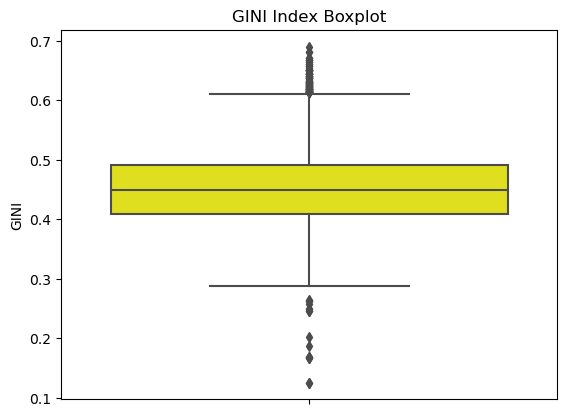

In [37]:
gini_hist = sns.histplot(data=mental_health, x='GINI', color='yellow').set(title="GINI Index Histogram")
plt.show()

gini_box = sns.boxplot(data=mental_health, y='GINI', color='yellow').set(title="GINI Index Boxplot")
plt.show()

In [38]:
gini_pop = mental_health[(mental_health.GINI <=0.2) | (mental_health.GINI >=0.65)].sort_values(['FIPS'])
gini_pop

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
116   36005019300  2016              5301          0.55        17268.0  \
671   36005050400  2017                63          0.00        55181.5   
1007  36005050400  2018                65          0.00        55181.5   
1043  36047005201  2016              1716          0.32        17129.0   
1313  36047036502  2016              1101          0.40        37708.0   
1357  36047041402  2016              1735          0.22        31063.0   
2108  36047041402  2017              1611          0.23        28884.0   
2859  36047041402  2018              1765          0.17        38375.0   
3577  36061003601  2017              3238          0.33        44286.0   
3860  36061003601  2018              3401          0.24        48990.0   
3916  36061009300  2018             10012          0.18        74828.0   
3633  36061009300  2017             10650          0.25        76058.0   
3944  36061011900  2018               996          0.50        12903.0   
3661  36061011900  2017              1068          0.56        11671.0   
3994  36061016400  2018              7260          0.27        32347.0   
3711  36061016400  2017              6901          0.24        33493.0   
3429  36061016400  2016              6722          0.22        33792.0   
3433  36061016800  2016              4974          0.38        26069.0   
3998  36061016800  2018              4681          0.37        31944.0   
3715  36061016800  2017              4693          0.38        26136.0   
3721  36061017401  2017              4127          0.37        21435.0   
3439  36061017401  2016              4330          0.35        20607.0   
4004  36061017401  2018              4508          0.44        20288.0   
4511  36081061302  2016                14          0.00        55181.5   
5161  36081061302  2017                15          0.00        55181.5   
5811  36081061302  2018                14          0.00        55181.5   
5367  36081128300  2017                29          0.00        32188.0   
6017  36081128300  2018                47          0.00        43889.0   
6254  36085022800  2017                39          0.00        55181.5   
6362  36085022800  2018                41          0.00        55181.5   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000   fel_one   
116              17.0  0.6509                     335.0000    90.117  \
671               2.0  0.6682                          NaN     0.126   
1007            246.0  0.6682                          NaN    15.990   
1043              2.0  0.6679                          NaN     3.432   
1313             28.0  0.6536                     966.0000    30.828   
1357              5.0  0.6553                     286.0000     8.675   
2108             17.0  0.6806                       0.1055    27.387   
2859              7.0  0.6806                       0.1055    12.355   
3577             85.0  0.6639                       0.1616   275.230   
3860             26.0  0.6639                       0.1616    88.426   
3916             17.0  0.6516                       0.2080   170.204   
3633            192.0  0.6516                       0.2080  2044.800   
3944            569.0  0.6503                       0.1226   566.724   
3661            618.0  0.6503                       0.1226   660.024   
3994             17.0  0.6609                       0.3008   123.420   
3711            118.0  0.6609                       0.3008   814.318   
3429             10.0  0.6580                      55.0000    67.220   
3433             14.0  0.6905                      34.0000    69.636   
3998             21.0  0.6721                       0.1838    98.301   
3715            124.0  0.6721                       0.1838   581.932   
3721             96.0  0.6580                       0.3398   396.192   
3439              9.0  0.6505                     112.0000    38.970   
4004             16.0  0.6580                       0.3398    

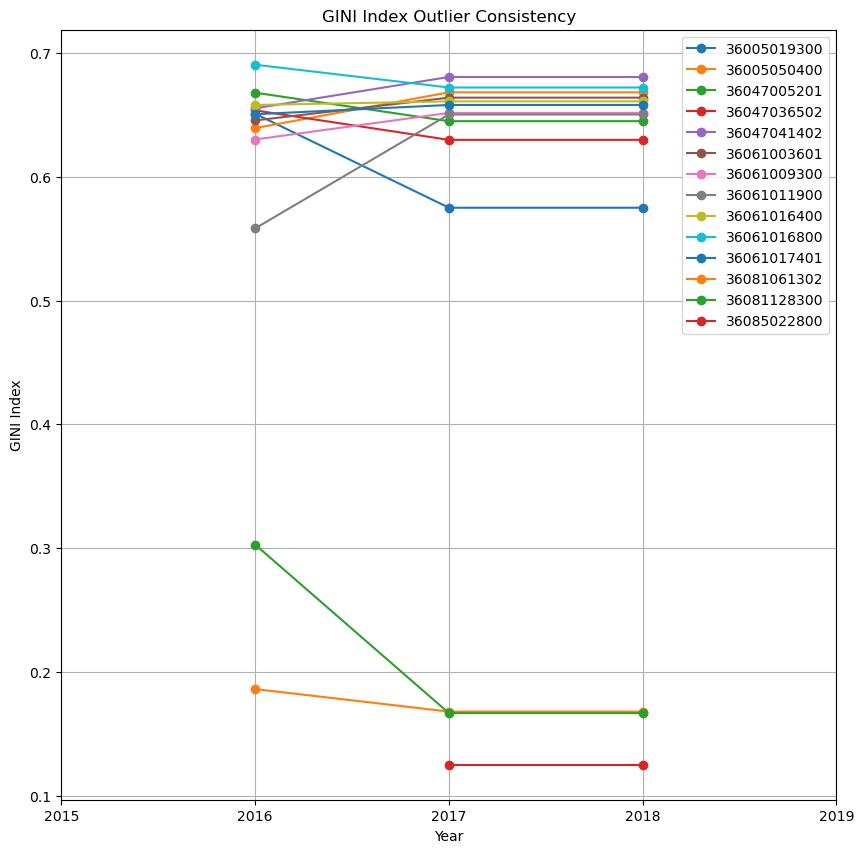

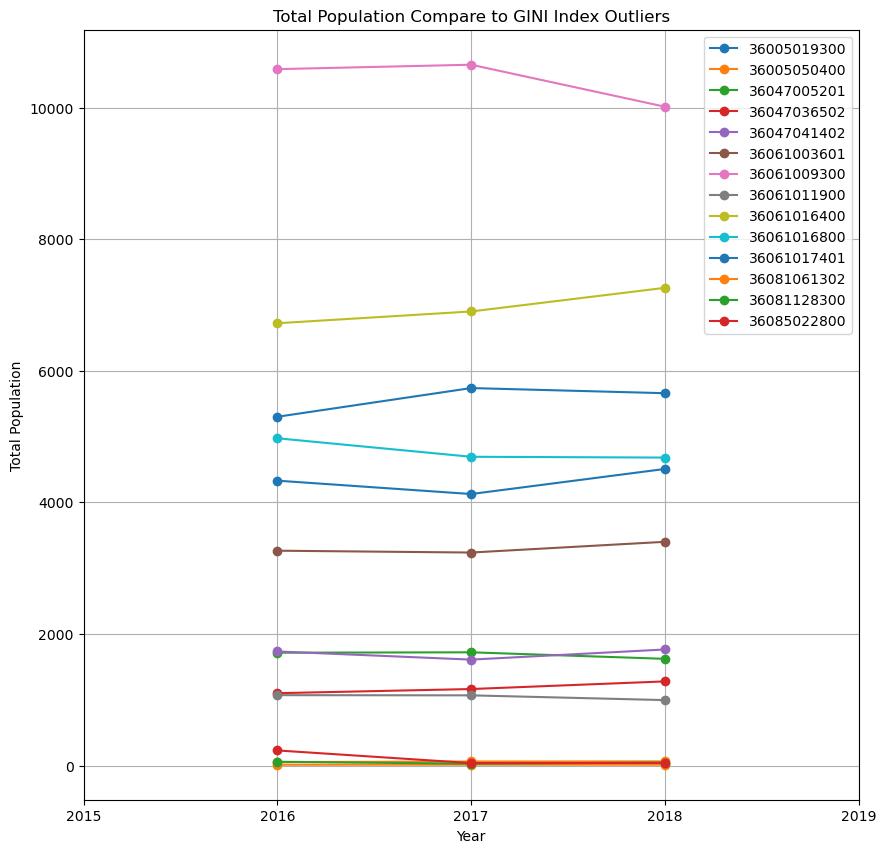

In [39]:
concern_gini = set(gini_pop['FIPS'])
#print(concern_gini)

#cgini = list(gini_pop['FIPS'])
#cgini

out_gini = mental_health['FIPS'].isin(concern_gini)
consistency_gini = mental_health[out_gini]

consistency_gini['Year'] = pd.to_datetime(consistency_gini['Year'], format='%Y')
consistency_gini.set_index('Year',inplace=True)


consistency_gini.groupby('FIPS')['GINI'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('GINI Index Outlier Consistency')
plt.ylabel('GINI Index')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_gini
plt.show()

consistency_gini.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Total Population Compare to GINI Index Outliers')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

In [40]:
gini_concern = mental_health[mental_health.FIPS == 36085022800]
gini_concern

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
6146  36085022800  2016               231           0.0        55181.5  \
6254  36085022800  2017                39           0.0        55181.5   
6362  36085022800  2018                41           0.0        55181.5   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
6146             17.0     NaN                          NaN      NaN  \
6254             38.0  0.1251                          NaN    1.482   
6362            927.0  0.1251                          NaN   38.007   

      house_one           City  boro_code  
6146        NaN  Staten Island          5  
6254        NaN  Staten Island          5  
6362        NaN  Staten Island          5

In [41]:
mental_health['GINI'] = mental_health['GINI'].fillna(mental_health['GINI'].median())

## Housing Violations Per 1000

Housing violations per 1000 had significant outliers that were assessed as being correct. The year 2016 had an increase for housing violations for every FIPS location, so I didn't want to incorrectly remove any values and impute them. 

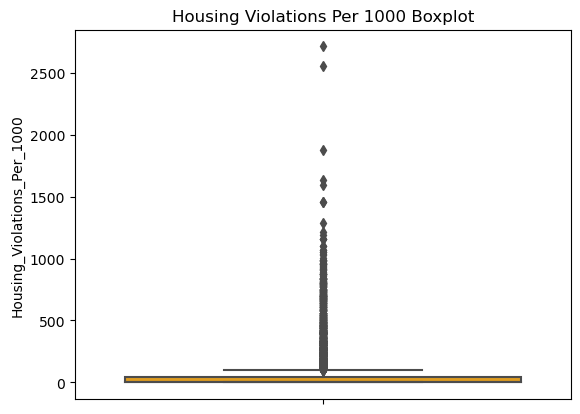

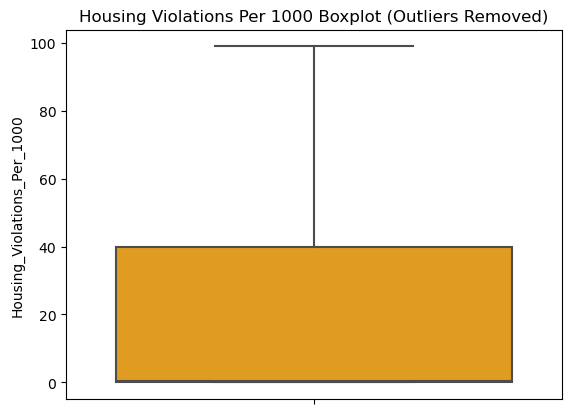

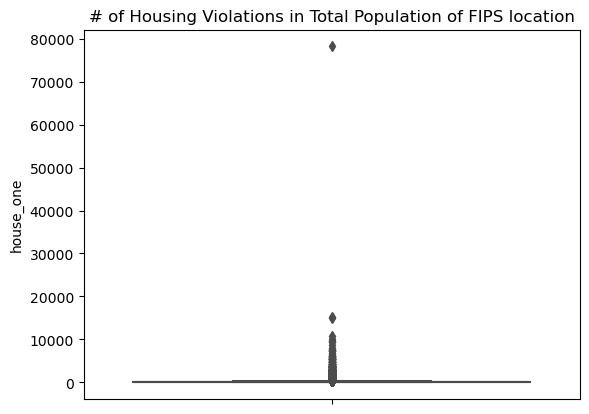

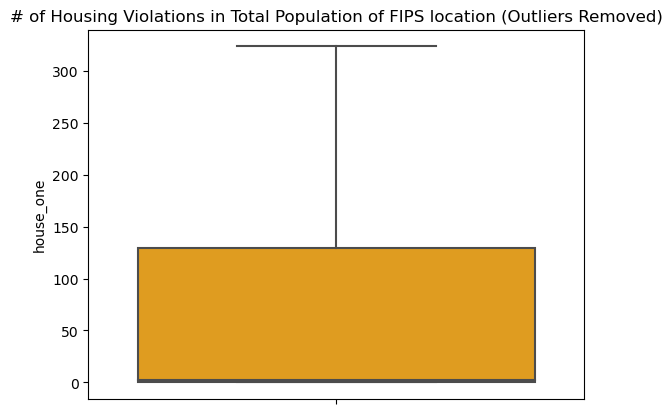

In [42]:
housing_box = sns.boxplot(data=mental_health, y='Housing_Violations_Per_1000', color='orange').set(title="Housing Violations Per 1000 Boxplot")
plt.show()

housing_box = sns.boxplot(data=mental_health, y='Housing_Violations_Per_1000', showfliers=False, color='orange').set(title="Housing Violations Per 1000 Boxplot (Outliers Removed)")
plt.show()

house_box = sns.boxplot(data=facets, y='house_one', color='orange').set(title="# of Housing Violations in Total Population of FIPS location")
plt.show()

house_box = sns.boxplot(data=facets, y='house_one',showfliers=False, color='orange').set(title="# of Housing Violations in Total Population of FIPS location (Outliers Removed)")
plt.show()

In [43]:
HV_pop = mental_health[(mental_health.house_one >= 10) & (mental_health.Total_Population <= 800)]
HV_pop.sort_values(['FIPS'])


FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
320   36005043500  2016                55          0.00        20417.0  \
1393  36047045000  2016               507          0.31        78438.0   
3352  36061009400  2016                33          0.00        41667.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
320              17.0  0.2988                        777.0   95.975  \
1393             33.0  0.5438                        104.0   16.731   
3352             17.0  0.4142                        357.0      NaN   

      house_one       City  boro_code  
320      42.735      Bronx          2  
1393     52.728   Brooklyn          3  
3352     11.781  Manhattan          1

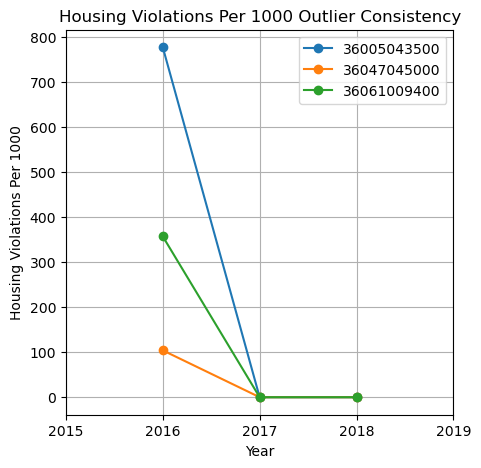

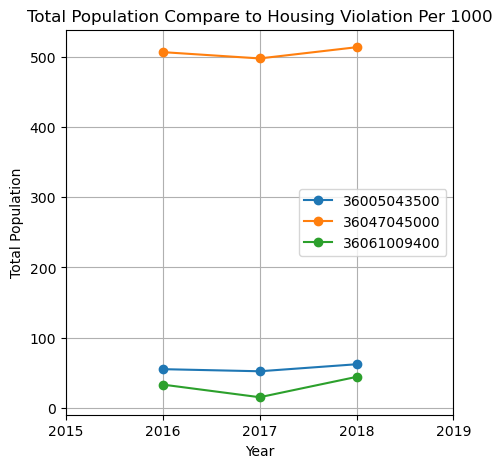

In [44]:
concern_hv = set(HV_pop['FIPS'])
#print(concern_hv)

#chv = list(HV_pop['FIPS'])
#chv

out_hv = mental_health['FIPS'].isin(concern_hv)
consistency_hv = mental_health[out_hv]

consistency_hv['Year'] = pd.to_datetime(consistency_hv['Year'], format='%Y')
consistency_hv.set_index('Year',inplace=True)


consistency_hv.groupby('FIPS')['Housing_Violations_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Housing Violations Per 1000 Outlier Consistency')
plt.ylabel('Housing Violations Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_hv
plt.show()

consistency_hv.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(5,5))
plt.title('Total Population Compare to Housing Violation Per 1000')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

In [45]:
H = mental_health[(mental_health.FIPS == 36005043500) | (mental_health.FIPS == 36047045000) | (mental_health.FIPS == 36061009400)]
H.sort_values(['FIPS'])

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
320   36005043500  2016                55          0.00        20417.0  \
656   36005043500  2017                52          0.00        42750.0   
992   36005043500  2018                62          0.13        55181.5   
1393  36047045000  2016               507          0.31        78438.0   
2144  36047045000  2017               498          0.47        29659.0   
2895  36047045000  2018               514          0.47        45938.0   
3352  36061009400  2016                33          0.00        41667.0   
3634  36061009400  2017                15          0.00        55181.5   
3917  36061009400  2018                44          0.00       199167.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
320              17.0  0.2988                     777.0000   95.975  \
656             182.0  0.2455                       0.0059    9.464   
992              17.0  0.2455                       0.0059  114.018   
1393             33.0  0.5438                     104.0000   16.731   
2144             15.0  0.6045                       0.0000    7.470   
2895             47.0  0.6045                       0.0000   24.158   
3352             17.0  0.4142                     357.0000      NaN   
3634            116.0  0.4154                       0.0316    1.740   
3917             17.0  0.4154                       0.0316  108.988   

      house_one       City  boro_code  
320   42.735000      Bronx          2  
656    0.000307      Bronx          2  
992    0.000366      Bronx          2  
1393  52.728000   Brooklyn          3  
2144   0.000000   Brooklyn          3  
2895   0.000000   Brooklyn          3  
3352  11.781000  Manhattan          1  
3634   0.000474  Manhattan          1  
3917   0.001390  Manhattan          1

In [46]:
house_pop = mental_health[(mental_health.Housing_Violations_Per_1000 >= 1000)]
house_pop

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
30    36005005600  2016              2391          0.40        17708.0  \
90    36005015700  2016              3761          0.34        31648.0   
150   36005022500  2016              8071          0.33        31309.0   
151   36005022701  2016              5981          0.32        29000.0   
165   36005023702  2016              1345          0.34        28824.0   
180   36005025100  2016              6246          0.30        32724.0   
190   36005026500  2016              6914          0.27        33284.0   
195   36005026900  2016              3318          0.29        34750.0   
196   36005027300  2016              8429          0.30        36656.0   
262   36005037300  2016              5096          0.34        30365.0   
332   36005046201  2016             28827          0.08        44856.0   
1010  36047000200  2016              1561          0.41        35500.0   
1592  36047078200  2016              4422          0.14        48807.0   
1597  36047079200  2016              3864          0.32        33932.0   
1638  36047087600  2016              1630          0.12        39784.0   
3528  36061027700  2016              7877          0.36        28302.0   
4336  36081033402  2016             12877          0.14        40736.0   
4517  36081062000  2016              1353          0.03        89621.0   
4594  36081077905  2016              2475          0.10        63776.0   
4718  36081129102  2016              3367          0.06        97031.0   
6072  36085002700  2016              2362          0.38        25957.0   
6106  36085013302  2016              3672          0.22        55052.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
30               14.0  0.5665                       1067.0   33.474  \
90               13.0  0.4638                       1593.0   48.893   
150              14.0  0.3937                       1158.0  112.994   
151               8.0  0.4122                       1004.0   47.848   
165              40.0  0.4778                       1215.0   53.800   
180              13.0  0.4415                       1158.0   81.198   
190              21.0  0.4828                       1458.0  145.194   
195              14.0  0.4269                       1098.0   46.452   
196               6.0  0.4270                       1291.0   50.574   
262              20.0  0.4164                       1056.0  101.920   
332              10.0  0.4250                       2714.0  288.270   
1010             22.0  0.3917                       1876.0   34.342   
1592              8.0  0.4122                       1056.0   35.376   
1597             16.0  0.4582                       1098.0   61.824   
1638             20.0  0.4721                       1189.0   32.600   
3528              6.0  0.4694                       1029.0   47.262   
4336             10.0  0.4122                       1161.0  128.770   
4517              5.0  0.3211                       2555.0    6.765   
4594              5.0  0.4193                       1067.0   12.375   
4718              6.0  0.4380                       1636.0   20.202   
6072             11.0  0.5163                       1039.0   25.982   
6106             16.0  0.4612                       1456.0   58.752   

      house_one           City  boro_code  
30     2551.197          Bronx          2  
90     5991.273          Bronx          2  
150    9346.218          Bronx          2  
151    6004.924          Bronx          2  
165    1634.175          Bronx          2  
180    7232.868          Bronx          2  
190   10080.612          Bronx          2  
195    3643.164          Bronx          2  
196   10881.839          Bronx          2  
262    5381.376          Bronx          2  
332   78236.478          Bronx          2  
1010   2928.436       Brooklyn          3  
1592   4669.632       Brooklyn          3  
1597   4242.672       Brooklyn          3  
1638   1938.070 

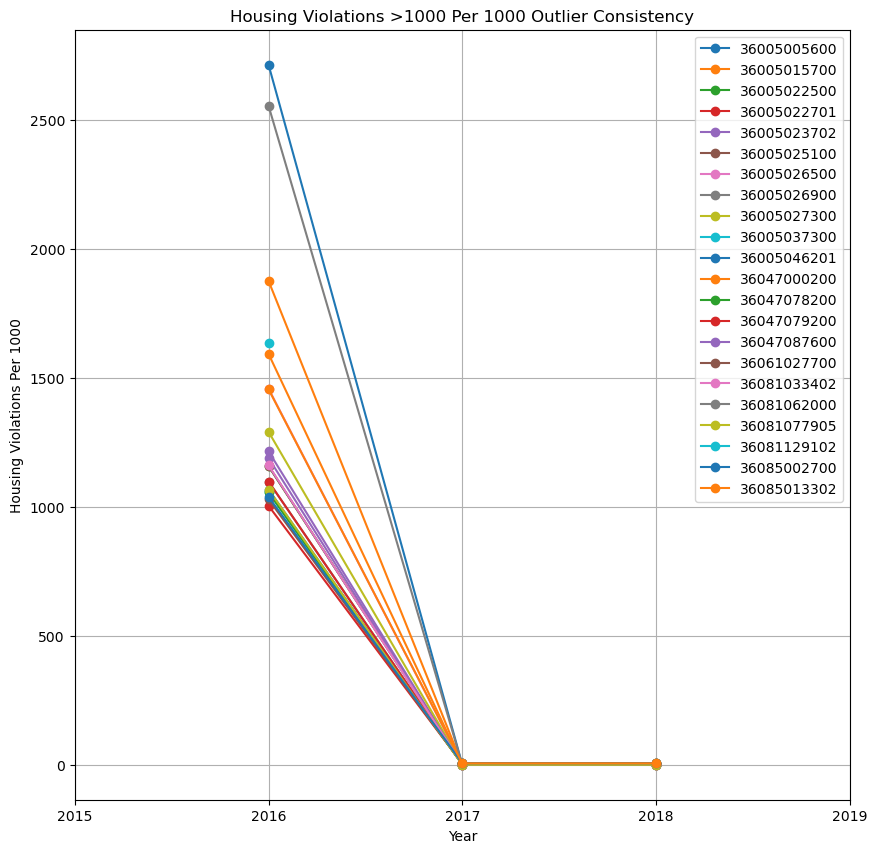

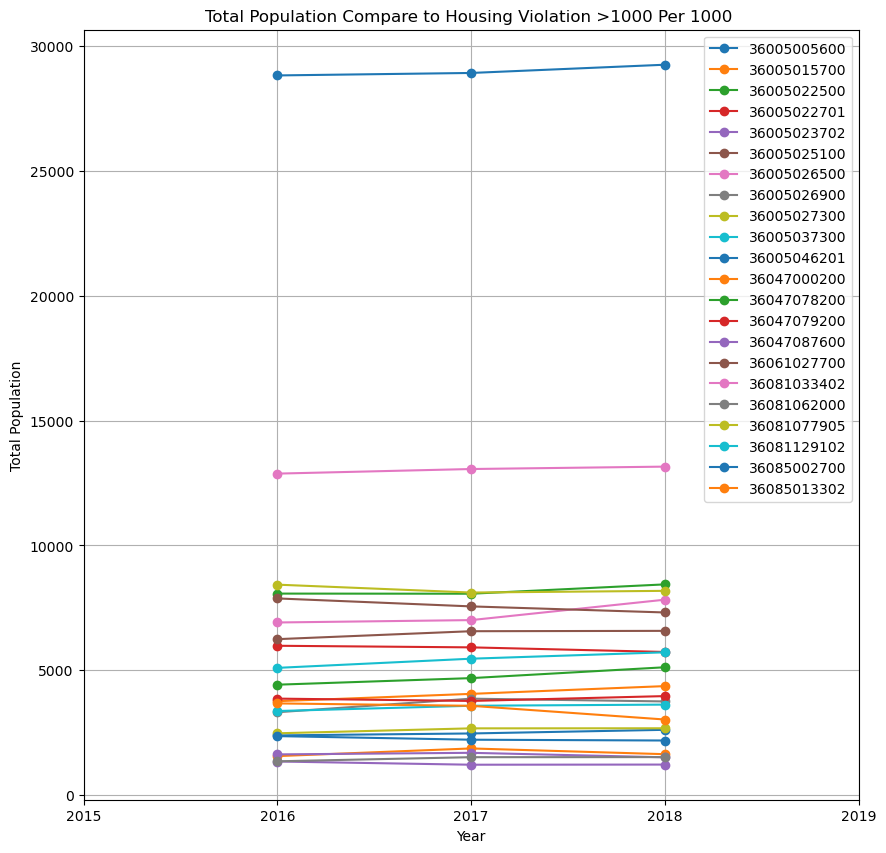

In [47]:
concern_house = set(house_pop['FIPS'])
#print(concern_house)

#chouse = list(house_pop['FIPS'])
#chouse

out_house = mental_health['FIPS'].isin(concern_house)
consistency_house = mental_health[out_house]

consistency_house['Year'] = pd.to_datetime(consistency_house['Year'], format='%Y')
consistency_house.set_index('Year',inplace=True)


consistency_house.groupby('FIPS')['Housing_Violations_Per_1000'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Housing Violations >1000 Per 1000 Outlier Consistency')
plt.ylabel('Housing Violations Per 1000')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
#consistency_house
plt.show()

consistency_house.groupby('FIPS')['Total_Population'].plot(legend=True,marker='o',grid=True,figsize=(10,10))
plt.title('Total Population Compare to Housing Violation >1000 Per 1000 ')
plt.ylabel('Total Population')
plt.xlim([datetime.date(2015,1,1),datetime.date(2019,1,1)])
plt.show()

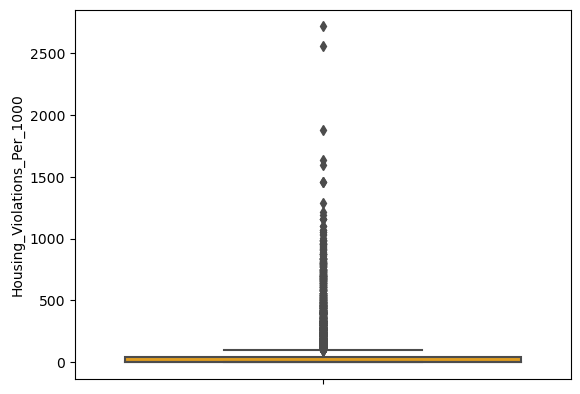

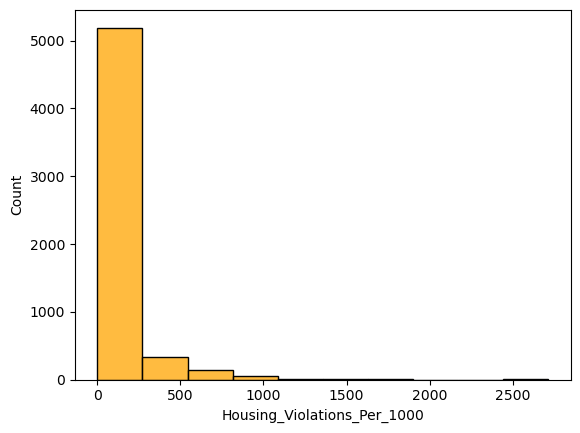

In [48]:
sns.boxplot(mental_health, y='Housing_Violations_Per_1000', color='orange')
plt.show()

sns.histplot(mental_health, x='Housing_Violations_Per_1000', bins=10, color='orange')
plt.show()

In [49]:
mental_health['Housing_Violations_Per_1000'] = mental_health['Housing_Violations_Per_1000'].fillna(mental_health['Housing_Violations_Per_1000'].median())

## Descriptive Statistics and Null check after clean and imputation.

In [50]:
mental_health[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000","fel_one","house_one"]].describe()

Total_Population  Poverty_Rate  MED_HH_Income  Felony_Per_1000   
count       6378.000000   6378.000000    6378.000000      6378.000000  \
mean        3957.852305      0.195378   59634.980401        40.029163   
std         2194.124914      0.131610   29252.545931        72.268327   
min            4.000000      0.000000    9327.000000         0.000000   
25%         2428.500000      0.090000   39626.750000         9.000000   
50%         3591.000000      0.170000   55181.500000        17.000000   
75%         4997.750000      0.270000   73828.250000        42.000000   
max        29256.000000      1.000000  250000.000000      1944.000000   

              GINI  Housing_Violations_Per_1000      fel_one     house_one  
count  6378.000000                  6378.000000  6364.000000   5725.000000  
mean      0.453794                    64.475070   167.418498    310.986407  
std       0.064482                   170.943849   346.922128   1349.885442  
min       0.125100                     0.000000     0.000000      0.000000  
25%       0.409850                     0.121100    28.734000      0.311389  
50%       0.449000                     0.420500    60.586500      1.776917  
75%       0.490600                     8.069825   144.298500    129.920000  
max       0.690500                  2714.000000  9661.284000  78236.478000

In [51]:
medianfill_mental = mental_health.isnull().sum()
medianfill_mental

FIPS                             0
Year                             0
Total_Population                 0
Poverty_Rate                     0
MED_HH_Income                    0
Felony_Per_1000                  0
GINI                             0
Housing_Violations_Per_1000      0
fel_one                         14
house_one                      653
City                             0
boro_code                        0
dtype: int64

## Boroughs Reference

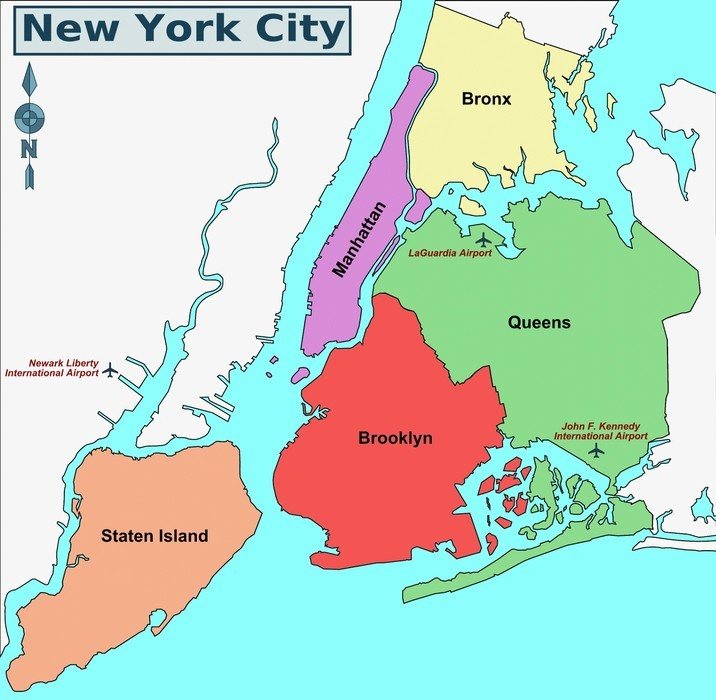

## Borough boundary map to be used as base for geo heatmaps

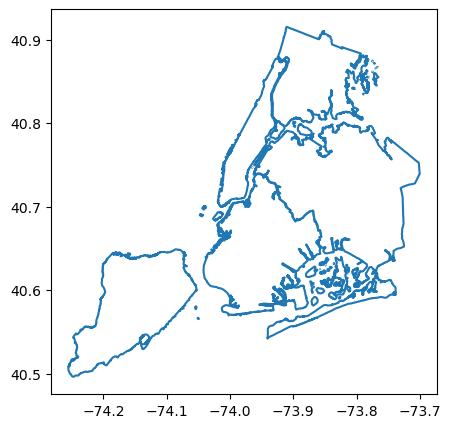

In [52]:
ax = newyorkborough['geometry'].boundary.plot(figsize=(5,5))

## Totals by Borough

In [53]:
map_mental = pd.merge(mental_health, newyorkborough, on = 'boro_code')
map_mental

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
0     36005000100  2016              8430          0.17        55181.5  \
1     36005000200  2016              5095          0.19        74837.0   
2     36005000400  2016              5572          0.12        77991.0   
3     36005001600  2016              5412          0.19        32354.0   
4     36005001900  2016              2569          0.45        34635.0   
...           ...   ...               ...           ...            ...   
6373  36085030301  2018              4897          0.09        65469.0   
6374  36085030302  2018              6142          0.15        84630.0   
6375  36085031901  2018              2564          0.37        23098.0   
6376  36085031902  2018              4480          0.41        23289.0   
6377  36085032300  2018              1218          0.23        64250.0   

      Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one   
0                40.0  0.4490                       0.4205  337.200  \
1                 8.0  0.4024                     135.0000   40.760   
2                10.0  0.3659                     145.0000   55.720   
3                 9.0  0.4898                      31.0000   48.708   
4                43.0  0.4420                     178.0000  110.467   
...               ...     ...                          ...      ...   
6373             17.0  0.4005                       0.5237   83.249   
6374              9.0  0.4038                       1.3825   55.278   
6375             35.0  0.5083                       1.1520   89.740   
6376             15.0  0.5671                      12.0023   67.200   
6377             77.0  0.5786                       1.0683   93.786   

       house_one           City  boro_code      boro_name    shape_area   
0            NaN          Bronx          2          Bronx  1.187175e+09  \
1     687.825000          Bronx          2          Bronx  1.187175e+09   
2     807.940000          Bronx          2          Bronx  1.187175e+09   
3     167.772000          Bronx          2          Bronx  1.187175e+09   
4     457.282000          Bronx          2          Bronx  1.187175e+09   
...          ...            ...        ...            ...           ...   
6373    2.564559  Staten Island          5  Staten Island  1.623621e+09   
6374    8.491315  Staten Island          5  Staten Island  1.623621e+09   
6375    2.953728  Staten Island          5  Staten Island  1.623621e+09   
6376   53.770304  Staten Island          5  Staten Island  1.623621e+09   
6377    1.301189  Staten Island          5  Staten Island  1.623621e+09   

         shape_leng                                           geometry  
0     463179.772813  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
1     463179.772813  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2     463179.772813  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
3     463179.772813  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
4     463179.772813  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
...             ...                                                ...  
6373  325917.353702  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
6374  325917.353702  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
6375  325917.353702  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
6376  325917.353702  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
6377  325917.353702  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  

[6378 rows x 16 columns]

In [54]:
sumbyboro = map_mental[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').sum()
sumbyboro['boro_code'] = [2,3,1,4,5]
sumbyboro

newyorkborough.sort_values('boro_name',inplace=True)
newyorkborough
sumboro = pd.merge(newyorkborough, sumbyboro, on='boro_code')
sumboro
#print("Type of DataFrame : ", type(sumboro), sumboro.shape[0])
#print("Type of DataFrame : ", type(newyorkborough), newyorkborough.shape[0])


boro_code      boro_name    shape_area     shape_leng   
0          2          Bronx  1.187175e+09  463179.772813  \
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Total_Population   
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...           4278357  \
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...           7772912   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...           4882878   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...           6891708   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...           1417327   

   Poverty_Rate  MED_HH_Income  Felony_Per_1000       GINI   
0        295.64     40059599.0          48986.0   456.0707  \
1        482.88    123307368.5          77897.0  1039.2900   
2        151.01     71205121.0          65013.0   441.1521   
3        273.67    122250607.0          54413.0   818.5827   
4         42.92     23529209.5           8997.0   139.2043   

   Housing_Violations_Per_1000  
0                  109948.1328  
1                  172008.8464  
2                   44208.1009  
3                   71468.8388  
4                   13588.0774

Text(0.5, 1.0, 'Housing Violations Per 1000 2016-2018')

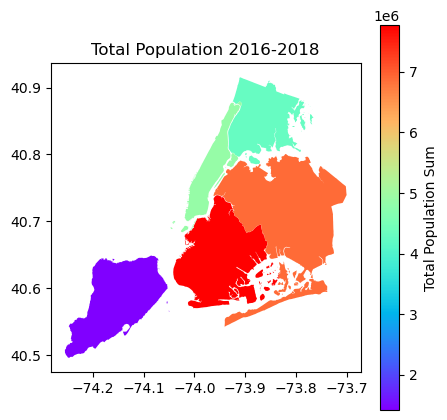

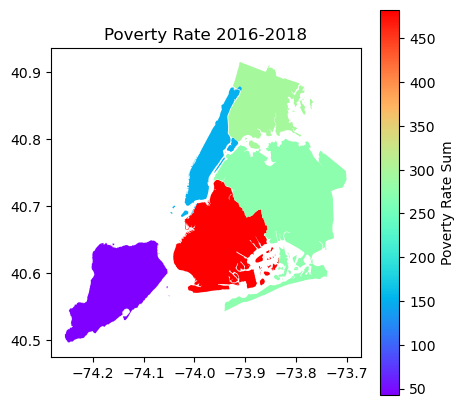

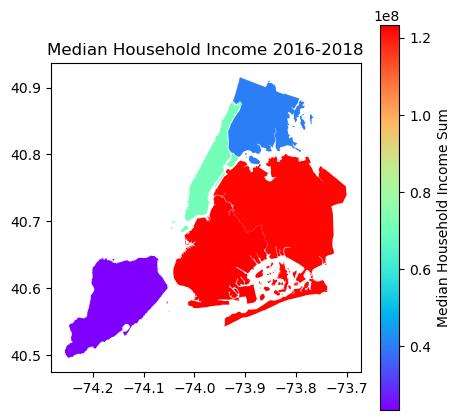

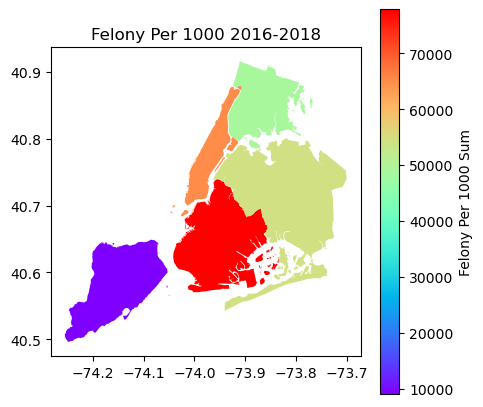

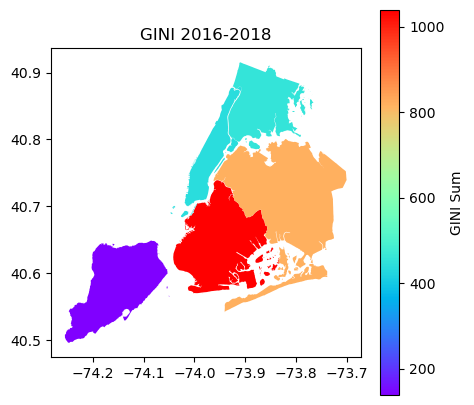

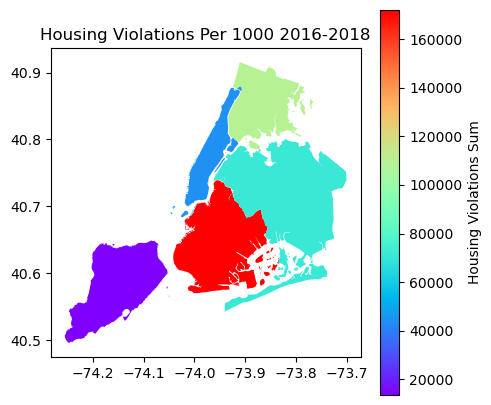

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='Total_Population', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "Total Population Sum"})
ax.set_title("Total Population 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='Poverty_Rate', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "Poverty Rate Sum"})
ax.set_title("Poverty Rate 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='MED_HH_Income', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "Median Household Income Sum"})
ax.set_title("Median Household Income 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='Felony_Per_1000', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "Felony Per 1000 Sum"})
ax.set_title("Felony Per 1000 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='GINI', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "GINI Sum"})
ax.set_title("GINI 2016-2018")

fig, ax = plt.subplots(figsize=(5,5))
sumboro.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='rainbow', legend= True, legend_kwds={"label": "Housing Violations Sum"})
ax.set_title("Housing Violations Per 1000 2016-2018")

##  Percentage

Text(0.5, 1.0, 'Housing Violations Per 1000 % 2016-2018')

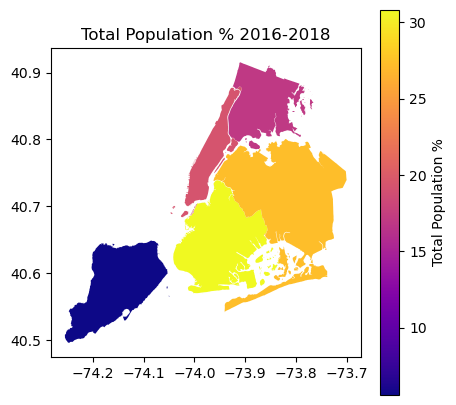

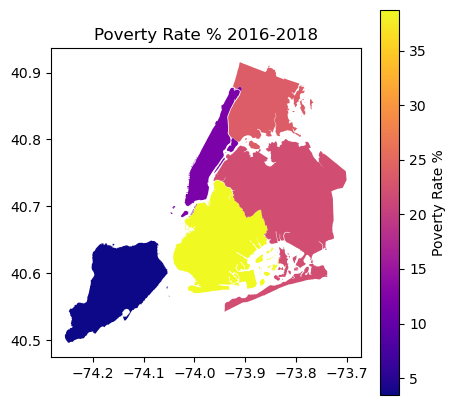

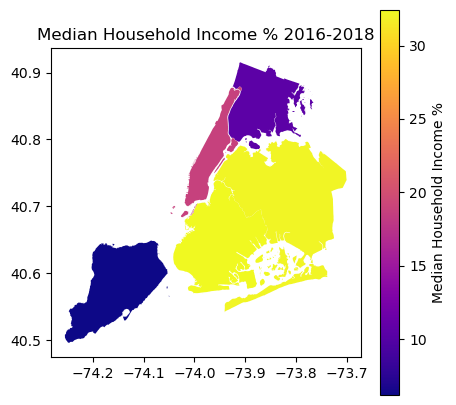

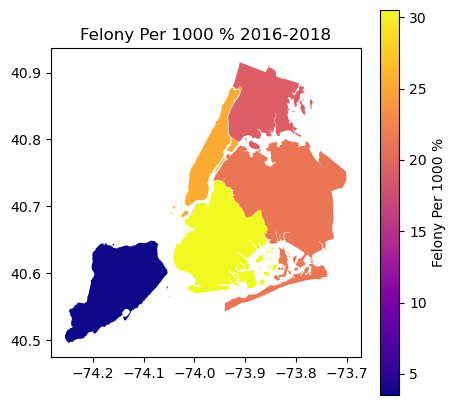

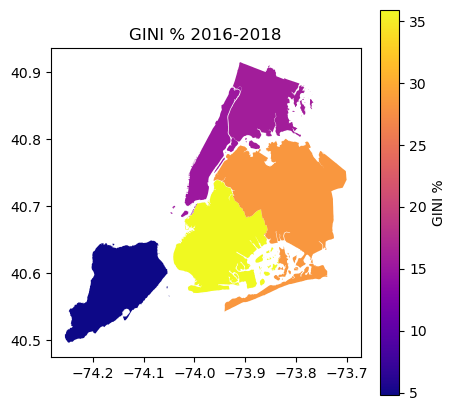

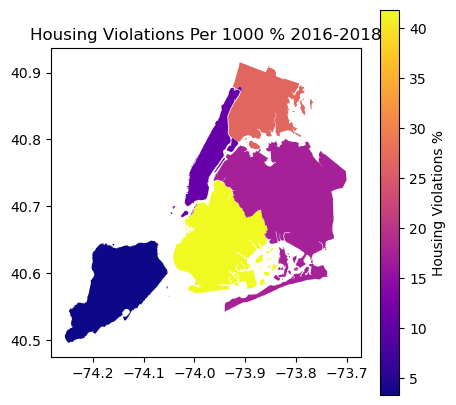

In [56]:
percentbyboro = pd.DataFrame()
percentbyboro['Percent_Total_Pop'] = (sumbyboro['Total_Population']/sumbyboro['Total_Population'].sum())*100
percentbyboro['Percent_Poverty_Rate'] = (sumbyboro['Poverty_Rate']/sumbyboro['Poverty_Rate'].sum())*100
percentbyboro['Percent_Median_Income'] = (sumbyboro['MED_HH_Income']/sumbyboro['MED_HH_Income'].sum())*100
percentbyboro['Percent_Felony'] = (sumbyboro['Felony_Per_1000']/sumbyboro['Felony_Per_1000'].sum())*100
percentbyboro['Percent_GINI'] = (sumbyboro['GINI']/sumbyboro['GINI'].sum())*100
percentbyboro['Percent_Housing'] = (sumbyboro['Housing_Violations_Per_1000']/sumbyboro['Housing_Violations_Per_1000'].sum())*100
percentbyboro['boro_code'] = [2,3,1,4,5]
percentbyboro

percentboro = pd.merge(newyorkborough, percentbyboro, on='boro_code')
percentboro

fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_Total_Pop', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "Total Population %"})
ax.set_title("Total Population % 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_Poverty_Rate', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "Poverty Rate %"})
ax.set_title("Poverty Rate % 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_Median_Income', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "Median Household Income %"})
ax.set_title("Median Household Income % 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_Felony', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "Felony Per 1000 %"})
ax.set_title("Felony Per 1000 % 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_GINI', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "GINI %"})
ax.set_title("GINI % 2016-2018")

fig, ax = plt.subplots(figsize=(5,5))
percentboro.plot(column='Percent_Housing', ax=ax, cmap='plasma', legend= True, legend_kwds={"label": "Housing Violations %"})
ax.set_title("Housing Violations Per 1000 % 2016-2018")

## Averages by Borough

Text(0.5, 1.0, 'Housing Violations Per 1000 Average 2016-2018')

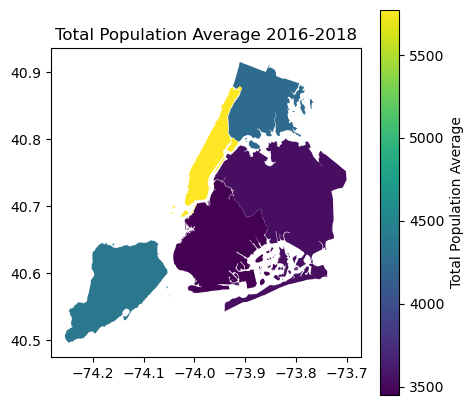

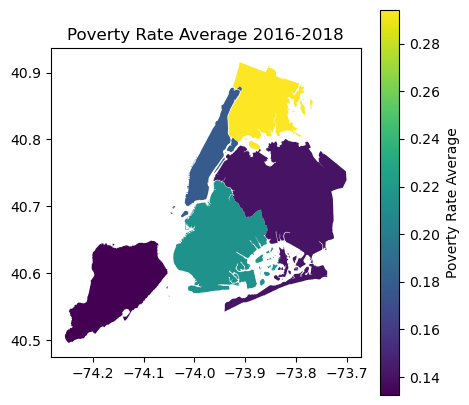

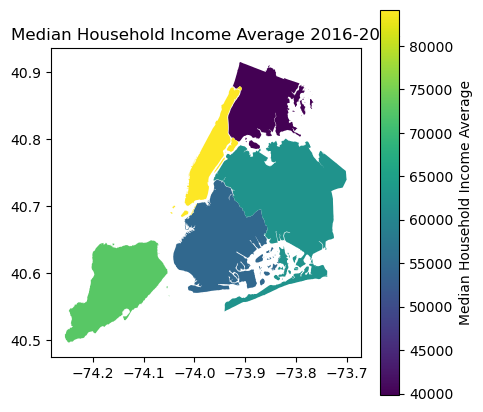

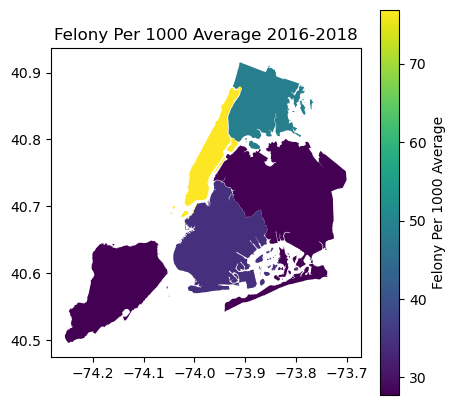

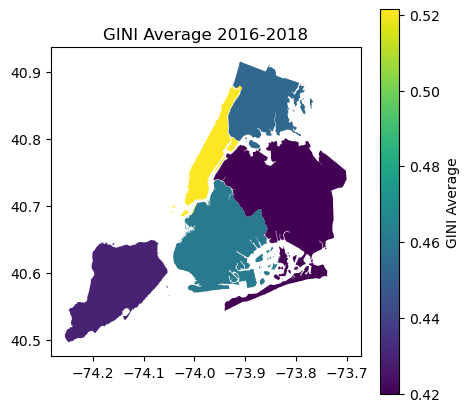

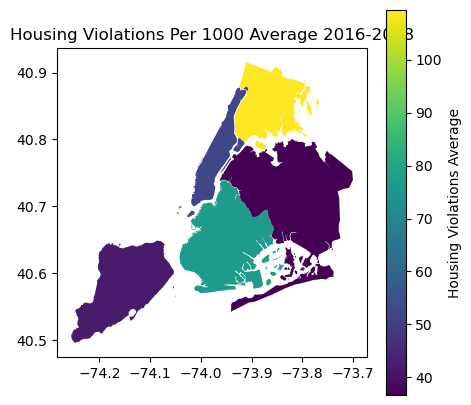

In [57]:
avgbyboro = map_mental[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').mean()
avgbyboro['boro_code'] = [2,3,1,4,5]
avgbyboro

newyorkborough.sort_values('boro_name',inplace=True)
newyorkborough
avgboro = pd.merge(newyorkborough, avgbyboro, on='boro_code')
avgboro
#print("Type of DataFrame : ", type(avgboro), avgboro.shape[0])
#print("Type of DataFrame : ", type(newyorkborough), newyorkborough.shape[0])


fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='Total_Population', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "Total Population Average"})
ax.set_title("Total Population Average 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='Poverty_Rate', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "Poverty Rate Average"})
ax.set_title("Poverty Rate Average 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='MED_HH_Income', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "Median Household Income Average"})
ax.set_title("Median Household Income Average 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='Felony_Per_1000', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "Felony Per 1000 Average"})
ax.set_title("Felony Per 1000 Average 2016-2018")


fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='GINI', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "GINI Average"})
ax.set_title("GINI Average 2016-2018")

fig, ax = plt.subplots(figsize=(5,5))
avgboro.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='viridis', legend= True, legend_kwds={"label": "Housing Violations Average"})
ax.set_title("Housing Violations Per 1000 Average 2016-2018")

## Yearly Breakdown

### 2016 Totals

In [58]:
year16.head()

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
0  36005000100  2016              8430           NaN            NaN  \
1  36005000200  2016              5095          0.19        74837.0   
2  36005000400  2016              5572          0.12        77991.0   
3  36005001600  2016              5412          0.19        32354.0   
4  36005001900  2016              2569          0.45        34635.0   

   Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one  house_one   
0             40.0     NaN                          NaN  337.200        NaN  \
1              8.0  0.4024                        135.0   40.760    687.825   
2             10.0  0.3659                        145.0   55.720    807.940   
3              9.0  0.4898                         31.0   48.708    167.772   
4             43.0  0.4420                        178.0  110.467    457.282   

    City  boro_code  
0  Bronx          2  
1  Bronx          2  
2  Bronx          2  
3  Bronx          2  
4  Bronx          2

In [59]:
sumby16 = year16[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').sum()
sumby16['boro_code'] = [2,3,1,4,5]
sumby16

sum16 = pd.merge(newyorkborough, sumby16, on='boro_code')
sum16
#print("Type of DataFrame : ", type(sum16), sum16.shape[0])


boro_code      boro_name    shape_area     shape_leng   
0          2          Bronx  1.187175e+09  463179.772813  \
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Total_Population   
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...           1413566  \
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...           2570801   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...           1618398   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...           2280602   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...            471522   

   Poverty_Rate  MED_HH_Income  Felony_Per_1000      GINI   
0         99.07     13070037.0           8054.0  149.5011  \
1        162.39     39741318.0           9720.0  342.4496   
2         50.11     22990893.0          11429.0  145.5053   
3         92.81     39788374.0           6167.0  268.5323   
4         13.80      7802279.0            756.0   45.7055   

   Housing_Violations_Per_1000  
0                     108968.0  
1                     171454.0  
2                      43826.0  
3                      71142.0  
4                      13291.0

Text(0.5, 1.0, 'Housing Violations Per 1000 2016')

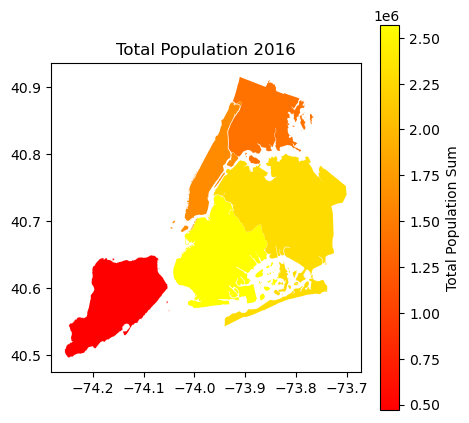

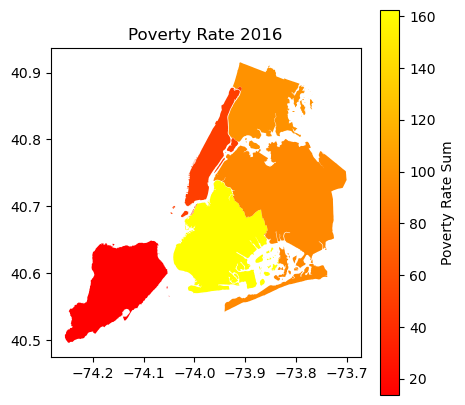

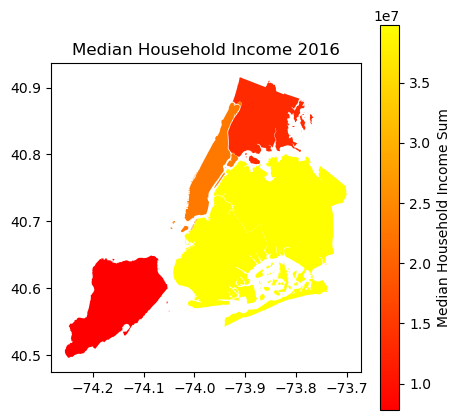

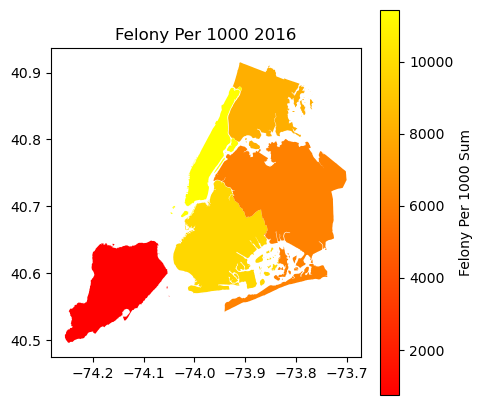

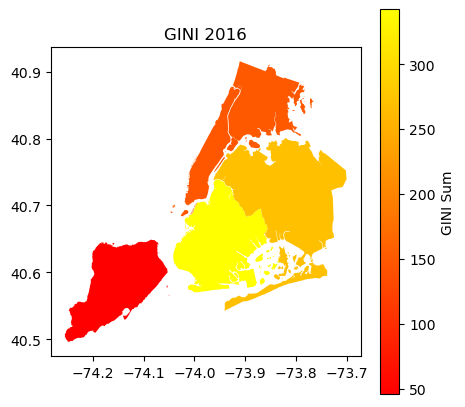

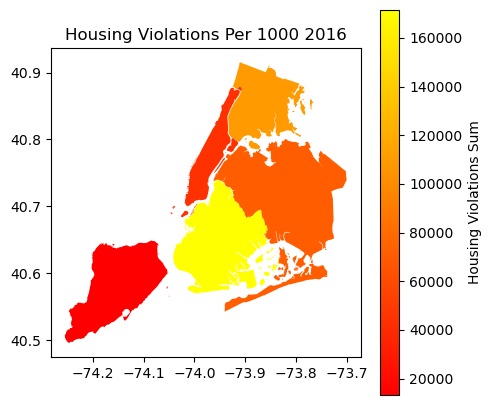

In [60]:
fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='Total_Population', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Total Population Sum"})
ax.set_title("Total Population 2016")


fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='Poverty_Rate', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Poverty Rate Sum"})
ax.set_title("Poverty Rate 2016")


fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='MED_HH_Income', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Median Household Income Sum"})
ax.set_title("Median Household Income 2016")


fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='Felony_Per_1000', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Felony Per 1000 Sum"})
ax.set_title("Felony Per 1000 2016")


fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='GINI', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "GINI Sum"})
ax.set_title("GINI 2016")

fig, ax = plt.subplots(figsize=(5,5))
sum16.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Housing Violations Sum"})
ax.set_title("Housing Violations Per 1000 2016")

### 2016 Percentages

Percent_Total_Pop  Percent_Poverty_Rate  Percent_Median_Income   
City                                                                            
Bronx                  16.919028             23.690755              10.592211  \
Brooklyn               30.770020             38.832560              32.207135   
Manhattan              19.370670             11.982878              18.632266   
Queens                 27.296616             22.193792              32.245270   
Staten Island           5.643666              3.300014               6.323118   

               Percent_Felony  Percent_GINI  Percent_Housing  boro_code  
City                                                                     
Bronx               22.294193     15.708950        26.663339          2  
Brooklyn            26.905830     35.983170        41.953015          3  
Manhattan           31.636494     15.289088        10.723767          1  
Queens              17.070808     28.216250        17.407709          4  
Staten Island        2.092676      4.802543         3.252170          5

Text(0.5, 1.0, 'Housing Violations Per 1000 % 2016')

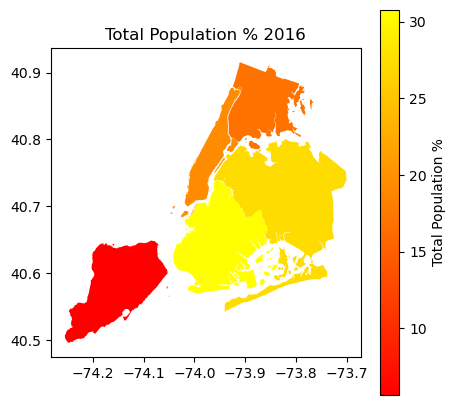

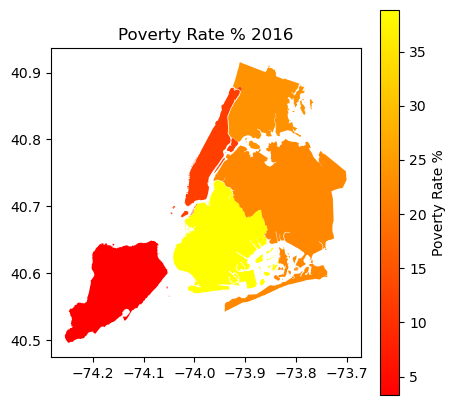

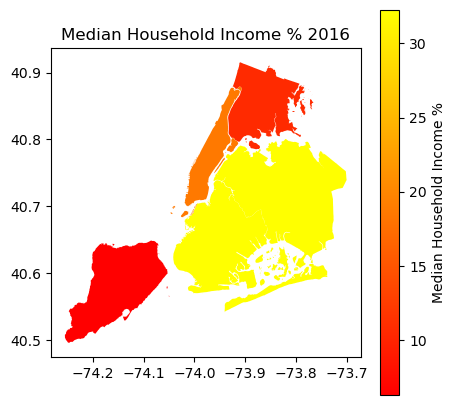

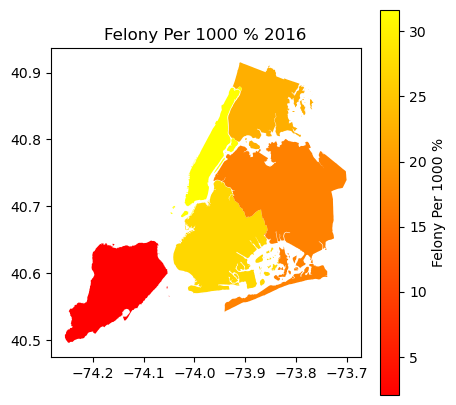

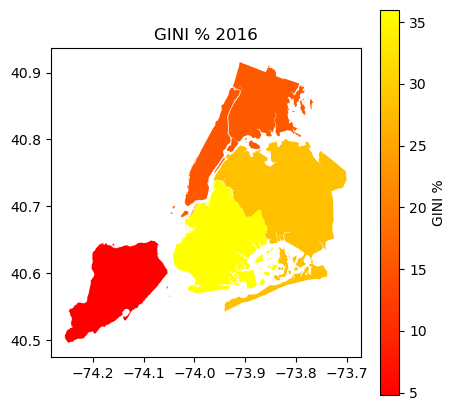

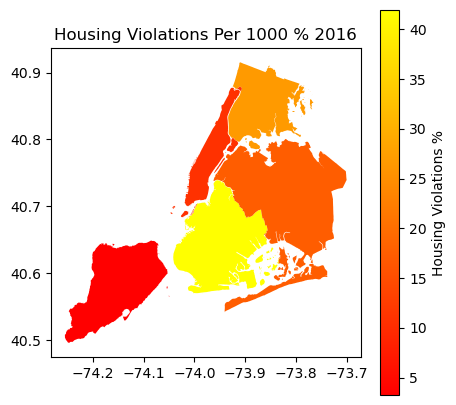

In [61]:
percentby2016 = pd.DataFrame()
percentby2016['Percent_Total_Pop'] = (sumby16['Total_Population']/sumby16['Total_Population'].sum())*100
percentby2016['Percent_Poverty_Rate'] = (sumby16['Poverty_Rate']/sumby16['Poverty_Rate'].sum())*100
percentby2016['Percent_Median_Income'] = (sumby16['MED_HH_Income']/sumby16['MED_HH_Income'].sum())*100
percentby2016['Percent_Felony'] = (sumby16['Felony_Per_1000']/sumby16['Felony_Per_1000'].sum())*100
percentby2016['Percent_GINI'] = (sumby16['GINI']/sumby16['GINI'].sum())*100
percentby2016['Percent_Housing'] = (sumby16['Housing_Violations_Per_1000']/sumby16['Housing_Violations_Per_1000'].sum())*100
percentby2016['boro_code'] = [2,3,1,4,5]
display(percentby2016)

percent2016 = pd.merge(newyorkborough, percentby2016, on='boro_code')
percent2016

fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_Total_Pop', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Total Population %"})
ax.set_title("Total Population % 2016")


fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_Poverty_Rate', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Poverty Rate %"})
ax.set_title("Poverty Rate % 2016")


fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_Median_Income', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Median Household Income %"})
ax.set_title("Median Household Income % 2016")


fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_Felony', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Felony Per 1000 %"})
ax.set_title("Felony Per 1000 % 2016")


fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_GINI', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "GINI %"})
ax.set_title("GINI % 2016")

fig, ax = plt.subplots(figsize=(5,5))
percent2016.plot(column='Percent_Housing', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Housing Violations %"})
ax.set_title("Housing Violations Per 1000 % 2016")

### 2016 Averages

Total_Population  Poverty_Rate  MED_HH_Income  Felony_Per_1000   
City                                                                            
Bronx               4194.557864      0.294851   39249.360360        23.970238  \
Brooklyn            3423.170439      0.216520   53130.104278        12.977303   
Manhattan           5739.000000      0.178327   82404.634409        40.964158   
Queens              3503.228879      0.142785   61879.275272         9.576087   
Staten Island       4365.944444      0.127778   72918.495327         7.065421   

                   GINI  Housing_Violations_Per_1000  boro_code  
City                                                             
Bronx          0.448952                   408.119850          2  
Brooklyn       0.457820                   272.581876          3  
Manhattan      0.521524                   188.094421          1  
Queens         0.416976                   174.367647          4  
Staten Island  0.427154                   221.516667          5

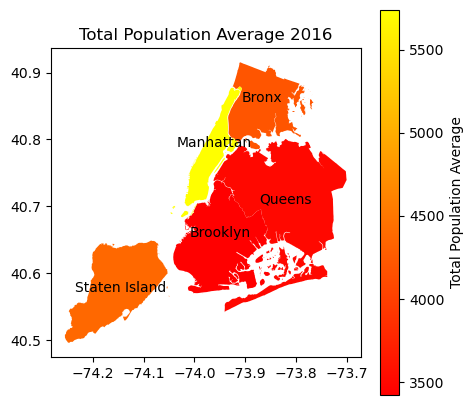

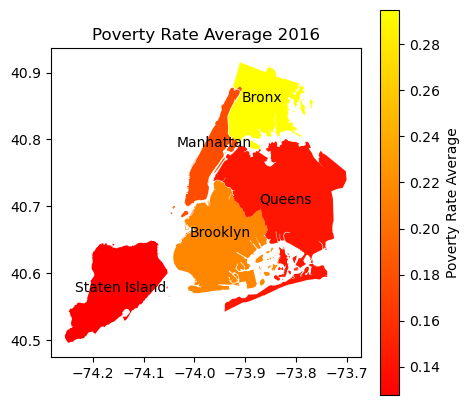

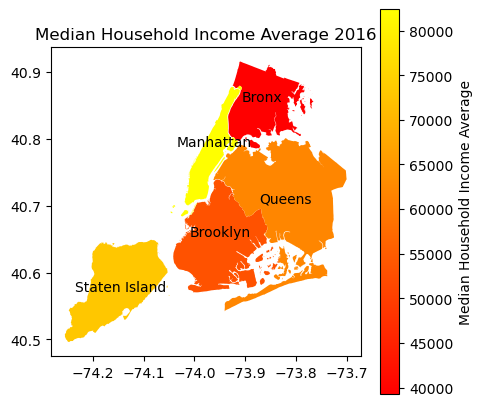

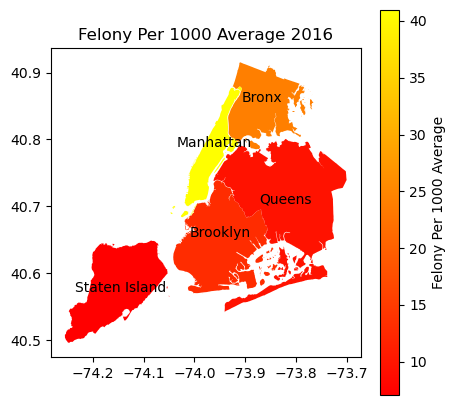

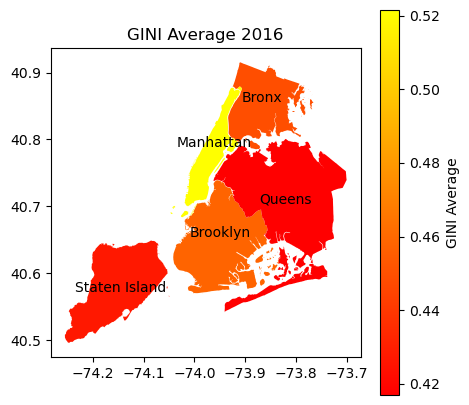

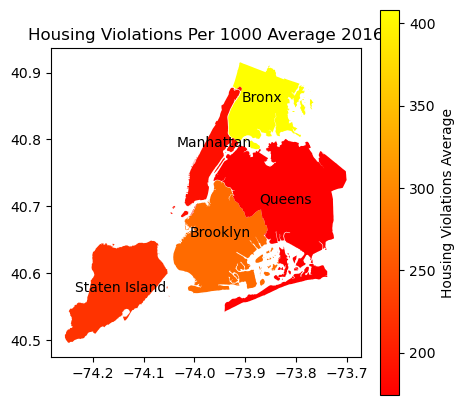

In [62]:
avgby2016 = year16[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').mean()
avgby2016['boro_code'] = [2,3,1,4,5]
display(avgby2016)

avg2016 = pd.merge(newyorkborough, avgby2016, on='boro_code')
avg2016
#print("Type of DataFrame : ", type(avg2016), avg2016.shape[0])


fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='Total_Population', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Total Population Average"})
ax.set_title("Total Population Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='Poverty_Rate', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Poverty Rate Average"})
ax.set_title("Poverty Rate Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='MED_HH_Income', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Median Household Income Average"})
ax.set_title("Median Household Income Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='Felony_Per_1000', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Felony Per 1000 Average"})
ax.set_title("Felony Per 1000 Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='GINI', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "GINI Average"})
ax.set_title("GINI Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2016.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='autumn', legend= True, legend_kwds={"label": "Housing Violations Average"})
ax.set_title("Housing Violations Per 1000 Average 2016")

avg2016['coords'] = avg2016['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2016['coords'] = [coords[0] for coords in avg2016['coords']]
for idx, row in avg2016.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

### 2017 Totals

In [63]:
year17.head()

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
337  36005000100  2017              7703           NaN            NaN  \
338  36005000200  2017              5403          0.20        72034.0   
339  36005000400  2017              5915          0.13        74836.0   
340  36005001600  2017              5879          0.26        32312.0   
341  36005001900  2017              2591          0.37        37936.0   

     Felony_Per_1000    GINI  Housing_Violations_Per_1000   fel_one   
337            955.0     NaN                          NaN  7356.365  \
338             71.0  0.3903                       0.0967   383.613   
339             77.0  0.3644                       0.3370   455.455   
340             86.0  0.5018                       0.1817   505.594   
341            193.0  0.4260                       0.5216   500.063   

     house_one   City  boro_code  
337        NaN  Bronx          2  
338   0.522470  Bronx          2  
339   1.993355  Bronx          2  
340   1.068214  Bronx          2  
341   1.351466  Bronx          2

In [64]:
sumby17 = year17[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').sum()
sumby17['boro_code'] = [2,3,1,4,5]
sumby17

sum17 = pd.merge(newyorkborough, sumby17, on='boro_code')
sum17
#print("Type of DataFrame : ", type(sum17), sum17.shape[0])


boro_code      boro_name    shape_area     shape_leng   
0          2          Bronx  1.187175e+09  463179.772813  \
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Total_Population   
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...           1428357  \
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...           2595259   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...           1629507   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...           2301139   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...            472481   

   Poverty_Rate  MED_HH_Income  Felony_Per_1000      GINI   
0         98.76     12933386.0          35442.0  151.9378  \
1        161.53     40590155.0          53766.0  346.3997   
2         50.54     23421786.0          42011.0  145.8029   
3         91.70     40020276.0          36917.0  271.4332   
4         14.25      7706272.0           6048.0   46.5249   

   Housing_Violations_Per_1000  
0                     474.0874  
1                     244.2037  
2                     177.8047  
3                     102.0264  
4                     135.0827

Text(0.5, 1.0, 'Housing Violations Per 1000 2017')

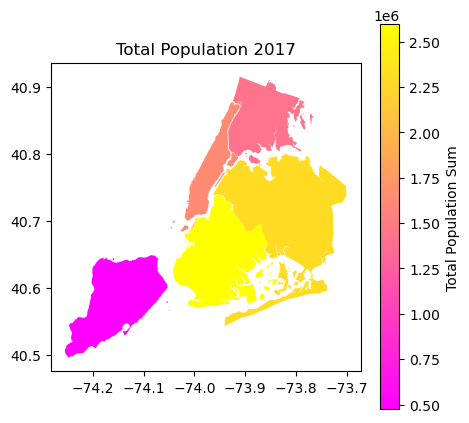

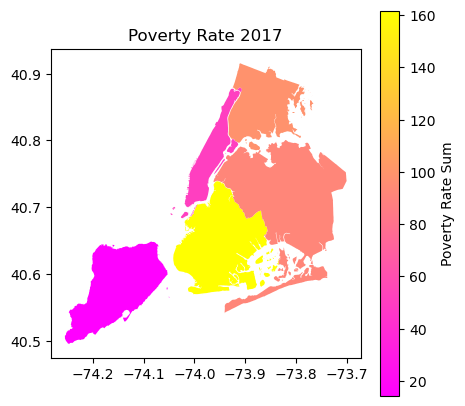

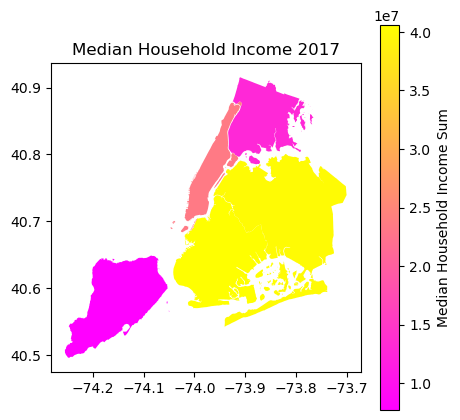

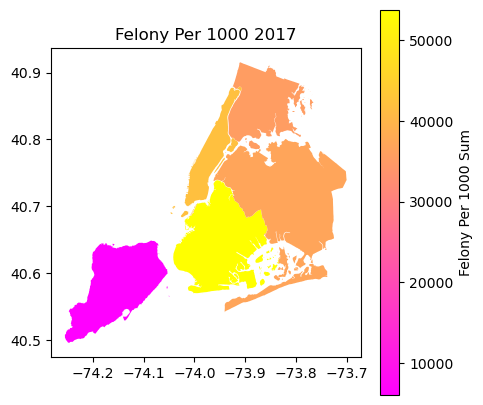

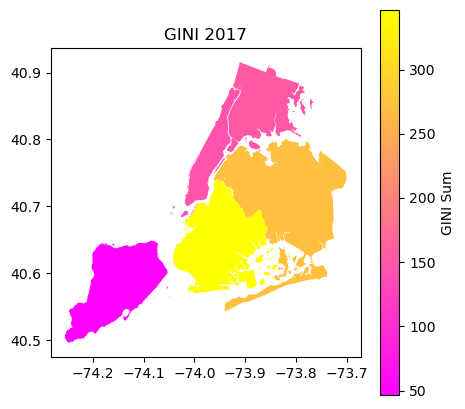

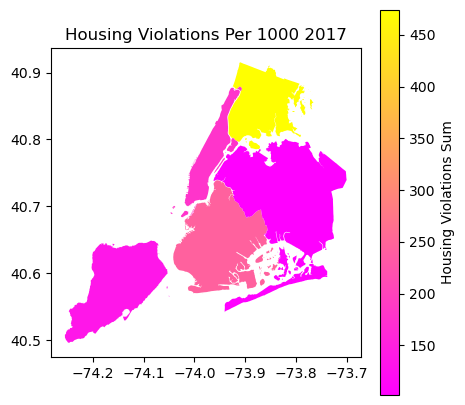

In [65]:
fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='Total_Population', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Total Population Sum"})
ax.set_title("Total Population 2017")


fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='Poverty_Rate', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Poverty Rate Sum"})
ax.set_title("Poverty Rate 2017")


fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='MED_HH_Income', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Median Household Income Sum"})
ax.set_title("Median Household Income 2017")


fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='Felony_Per_1000', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Felony Per 1000 Sum"})
ax.set_title("Felony Per 1000 2017")


fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='GINI', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "GINI Sum"})
ax.set_title("GINI 2017")

fig, ax = plt.subplots(figsize=(5,5))
sum17.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Housing Violations Sum"})
ax.set_title("Housing Violations Per 1000 2017")

### 2017 Percentages

Percent_Total_Pop  Percent_Poverty_Rate  Percent_Median_Income   
City                                                                            
Bronx                  16.950286             23.695955              10.373940  \
Brooklyn               30.797890             38.756658              32.557588   
Manhattan              19.337329             12.126302              18.786744   
Queens                 27.307573             22.002015              32.100485   
Staten Island           5.606923              3.419070               6.181243   

               Percent_Felony  Percent_GINI  Percent_Housing  boro_code  
City                                                                     
Bronx               20.347449     15.792333        41.835982          2  
Brooklyn            30.867359     36.004598        21.549827          3  
Manhattan           24.118748     15.154675        15.690428          1  
Queens              21.194254     28.212621         9.003350          4  
Staten Island        3.472190      4.835773        11.920413          5

Text(0.5, 1.0, 'Housing Violations Per 1000 % 2017')

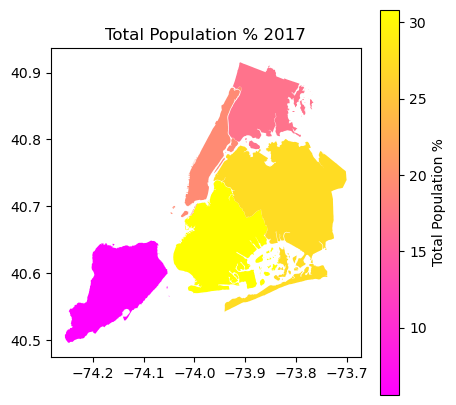

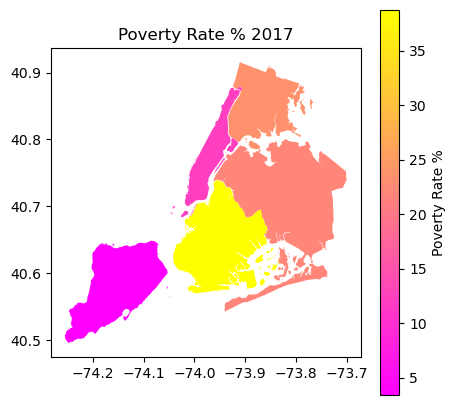

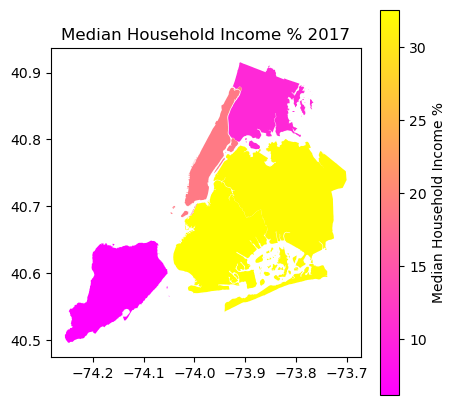

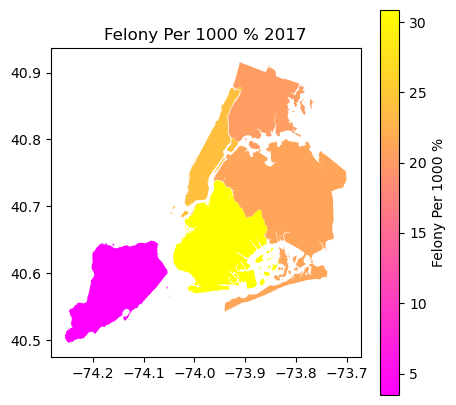

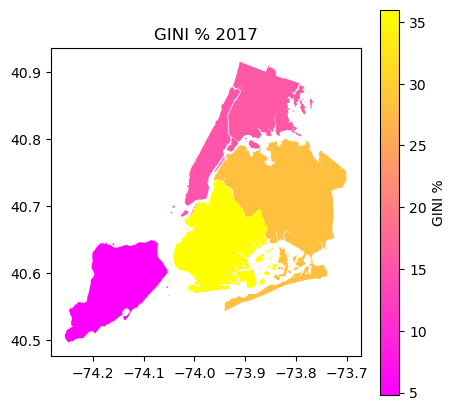

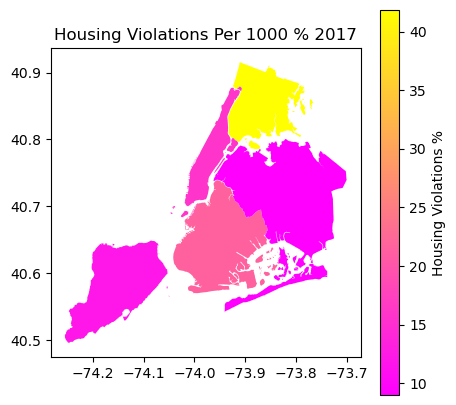

In [66]:
percentby2017 = pd.DataFrame()
percentby2017['Percent_Total_Pop'] = (sumby17['Total_Population']/sumby17['Total_Population'].sum())*100
percentby2017['Percent_Poverty_Rate'] = (sumby17['Poverty_Rate']/sumby17['Poverty_Rate'].sum())*100
percentby2017['Percent_Median_Income'] = (sumby17['MED_HH_Income']/sumby17['MED_HH_Income'].sum())*100
percentby2017['Percent_Felony'] = (sumby17['Felony_Per_1000']/sumby17['Felony_Per_1000'].sum())*100
percentby2017['Percent_GINI'] = (sumby17['GINI']/sumby17['GINI'].sum())*100
percentby2017['Percent_Housing'] = (sumby17['Housing_Violations_Per_1000']/sumby17['Housing_Violations_Per_1000'].sum())*100
percentby2017['boro_code'] = [2,3,1,4,5]
display(percentby2017)

percent2017 = pd.merge(newyorkborough, percentby2017, on='boro_code')
percent2017

fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_Total_Pop', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Total Population %"})
ax.set_title("Total Population % 2017")


fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_Poverty_Rate', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Poverty Rate %"})
ax.set_title("Poverty Rate % 2017")


fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_Median_Income', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Median Household Income %"})
ax.set_title("Median Household Income % 2017")


fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_Felony', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Felony Per 1000 %"})
ax.set_title("Felony Per 1000 % 2017")


fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_GINI', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "GINI %"})
ax.set_title("GINI % 2017")

fig, ax = plt.subplots(figsize=(5,5))
percent2017.plot(column='Percent_Housing', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Housing Violations %"})
ax.set_title("Housing Violations Per 1000 % 2017")

### 2017 Averages

Total_Population  Poverty_Rate  MED_HH_Income  Felony_Per_1000   
City                                                                            
Bronx               4251.062500      0.294806   39311.203647       105.482143  \
Brooklyn            3455.737683      0.215373   54264.913102        71.592543   
Manhattan           5757.975265      0.179220   84555.184116       148.448763   
Queens              3540.213846      0.141077   62336.878505        56.970679   
Staten Island       4374.824074      0.131944   72021.233645        56.000000   

                   GINI  Housing_Violations_Per_1000  boro_code  
City                                                             
Bronx          0.456270                     1.432288          2  
Brooklyn       0.463101                     0.333156          3  
Manhattan      0.522591                     0.644220          1  
Queens         0.420827                     0.163242          4  
Staten Island  0.430786                     1.350827          5

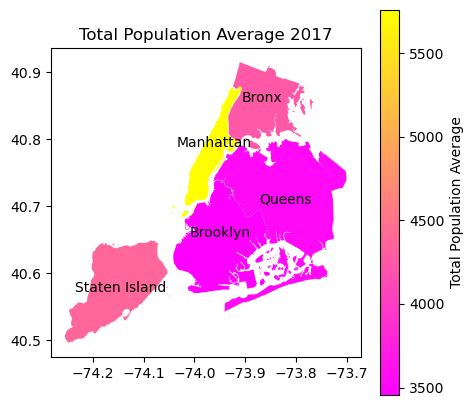

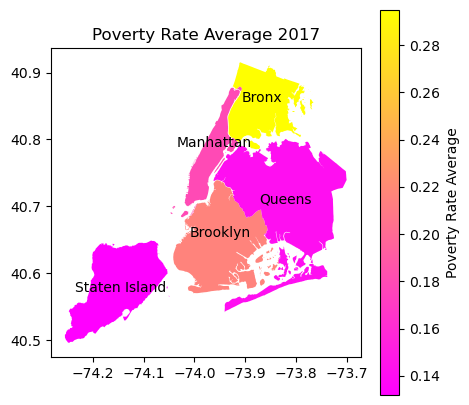

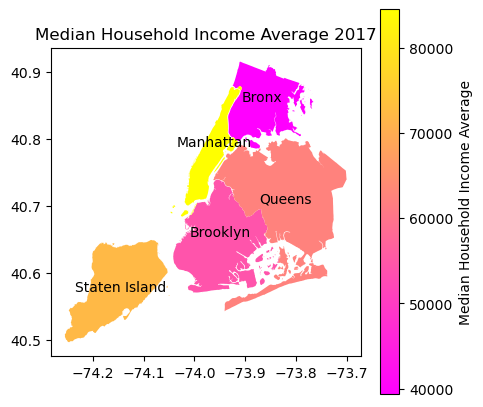

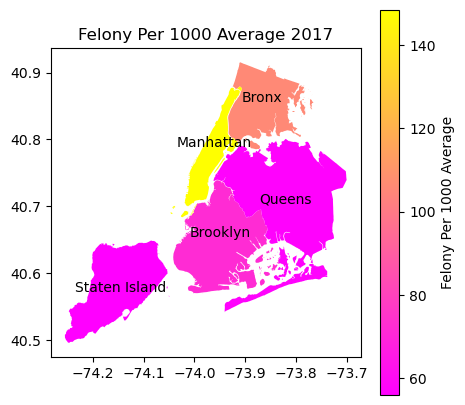

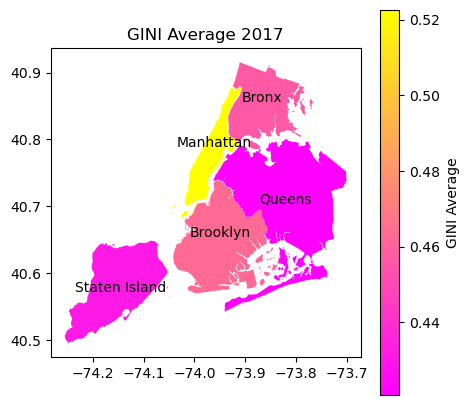

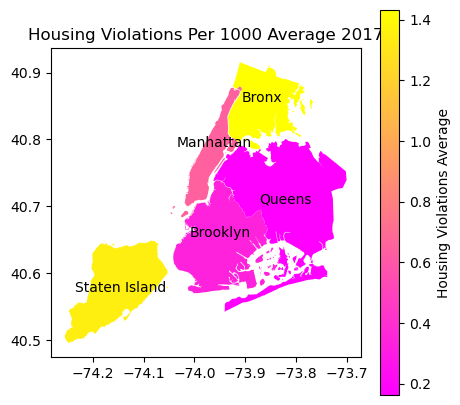

In [67]:
avgby2017 = year17[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').mean()
avgby2017['boro_code'] = [2,3,1,4,5]
display(avgby2017)

avg2017 = pd.merge(newyorkborough, avgby2017, on='boro_code')
avg2017
#print("Type of DataFrame : ", type(avg2016), avg2016.shape[0])



fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='Total_Population', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Total Population Average"})
ax.set_title("Total Population Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='Poverty_Rate', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Poverty Rate Average"})
ax.set_title("Poverty Rate Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='MED_HH_Income', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Median Household Income Average"})
ax.set_title("Median Household Income Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='Felony_Per_1000', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Felony Per 1000 Average"})
ax.set_title("Felony Per 1000 Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='GINI', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "GINI Average"})
ax.set_title("GINI Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2017.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='spring', legend= True, legend_kwds={"label": "Housing Violations Average"})
ax.set_title("Housing Violations Per 1000 Average 2017")

avg2017['coords'] = avg2017['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2017['coords'] = [coords[0] for coords in avg2017['coords']]
for idx, row in avg2017.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

### 2018 Totals

In [68]:
year18.head()

FIPS  Year  Total_Population  Poverty_Rate  MED_HH_Income   
673  36005000100  2018              7503           NaN            NaN  \
674  36005000200  2018              5251          0.16        70893.0   
675  36005000400  2018              5980          0.12        76667.0   
676  36005001600  2018              6056          0.29        31540.0   
677  36005001900  2018              2682          0.35        39130.0   

     Felony_Per_1000    GINI  Housing_Violations_Per_1000  fel_one  house_one   
673             89.0     NaN                          NaN  667.767        NaN  \
674             10.0  0.3903                       0.0967   52.510   0.507772   
675             12.0  0.3644                       0.3370   71.760   2.015260   
676             11.0  0.5018                       0.1817   66.616   1.100375   
677             59.0  0.4260                       0.5216  158.238   1.398931   

      City  boro_code  
673  Bronx          2  
674  Bronx          2  
675  Bronx          2  
676  Bronx          2  
677  Bronx          2

In [69]:
sumby18 = year18[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').sum()
sumby18['boro_code'] = [2,3,1,4,5]
sumby18

sum18 = pd.merge(newyorkborough, sumby18, on='boro_code')
sum18
#print("Type of DataFrame : ", type(sum18), sum18.shape[0])


boro_code      boro_name    shape_area     shape_leng   
0          2          Bronx  1.187175e+09  463179.772813  \
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Total_Population   
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...           1436785  \
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...           2606852   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...           1634989   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...           2310011   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...            473324   

   Poverty_Rate  MED_HH_Income  Felony_Per_1000      GINI   
0         97.87     13283635.0           9636.0  151.9378  \
1        158.45     42479262.0          16360.0  346.3997   
2         49.85     24130264.0          72721.0  145.8029   
3         89.16     41117601.0          18926.0  271.4332   
4         14.87      7855114.0           2176.0   46.5249   

   Housing_Violations_Per_1000  
0                     474.0874  
1                     244.2037  
2                     177.8047  
3                     102.0264  
4                     135.0827

Text(0.5, 1.0, 'Housing Violations Per 1000 2018')

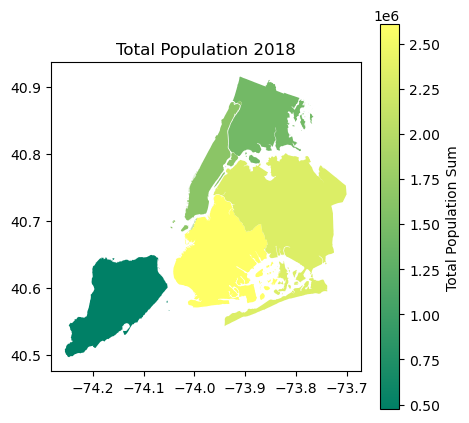

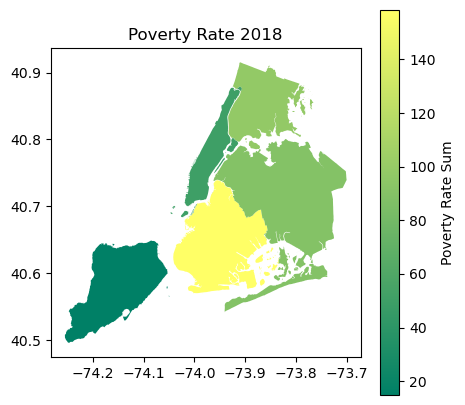

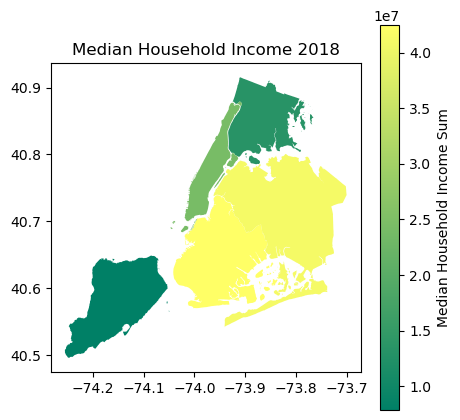

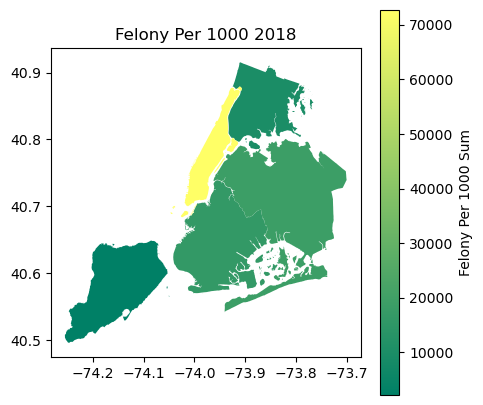

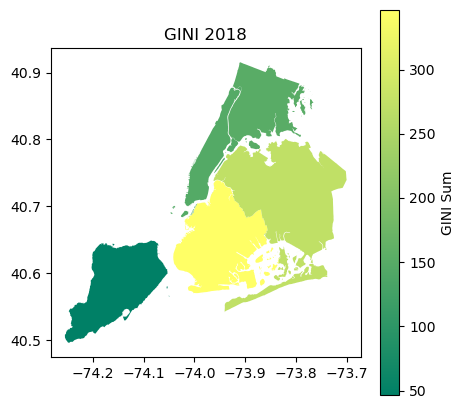

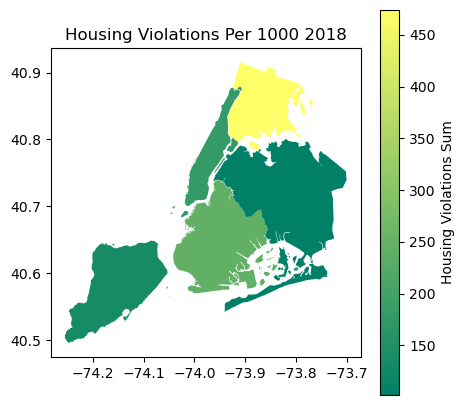

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='Total_Population', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Total Population Sum"})
ax.set_title("Total Population 2018")


fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='Poverty_Rate', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Poverty Rate Sum"})
ax.set_title("Poverty Rate 2018")


fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='MED_HH_Income', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Median Household Income Sum"})
ax.set_title("Median Household Income 2018")


fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='Felony_Per_1000', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Felony Per 1000 Sum"})
ax.set_title("Felony Per 1000 2018")


fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='GINI', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "GINI Sum"})
ax.set_title("GINI 2018")

fig, ax = plt.subplots(figsize=(5,5))
sum18.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Housing Violations Sum"})
ax.set_title("Housing Violations Per 1000 2018")

### 2018 Percentages

Text(0.5, 1.0, 'Housing Violations Per 1000 % 2018')

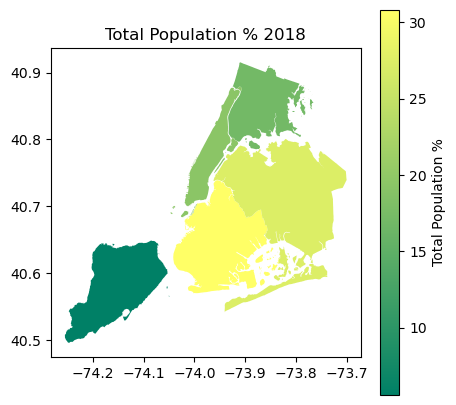

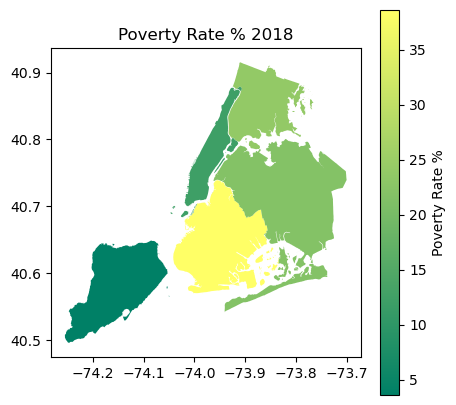

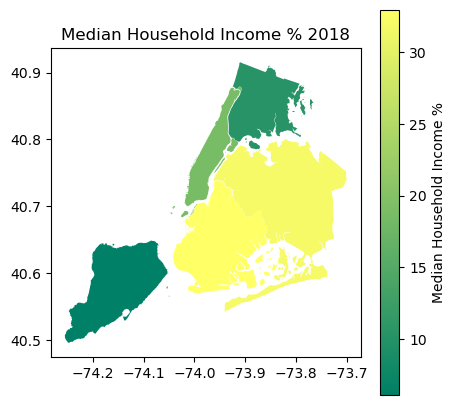

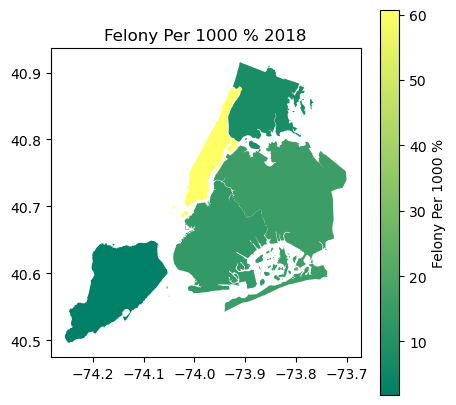

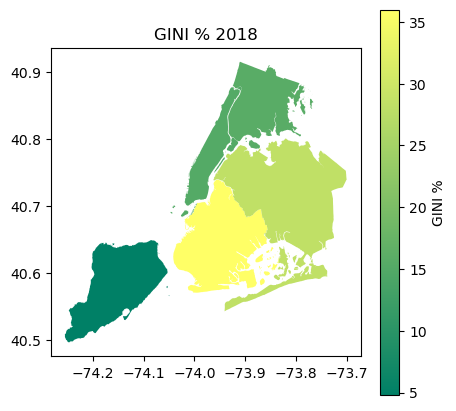

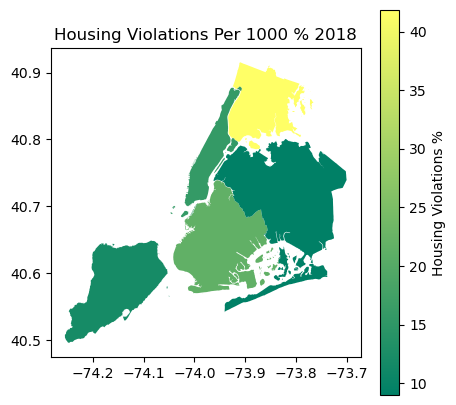

In [71]:
percentby2018 = pd.DataFrame()
percentby2018['Percent_Total_Pop'] = (sumby18['Total_Population']/sumby18['Total_Population'].sum())*100
percentby2018['Percent_Poverty_Rate'] = (sumby18['Poverty_Rate']/sumby18['Poverty_Rate'].sum())*100
percentby2018['Percent_Median_Income'] = (sumby18['MED_HH_Income']/sumby18['MED_HH_Income'].sum())*100
percentby2018['Percent_Felony'] = (sumby18['Felony_Per_1000']/sumby18['Felony_Per_1000'].sum())*100
percentby2018['Percent_GINI'] = (sumby18['GINI']/sumby18['GINI'].sum())*100
percentby2018['Percent_Housing'] = (sumby18['Housing_Violations_Per_1000']/sumby17['Housing_Violations_Per_1000'].sum())*100
percentby2018['boro_code'] = [2,3,1,4,5]
percentby2018

percent2018 = pd.merge(newyorkborough, percentby2018, on='boro_code')
percent2018

fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_Total_Pop', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Total Population %"})
ax.set_title("Total Population % 2018")


fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_Poverty_Rate', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Poverty Rate %"})
ax.set_title("Poverty Rate % 2018")


fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_Median_Income', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Median Household Income %"})
ax.set_title("Median Household Income % 2018")


fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_Felony', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Felony Per 1000 %"})
ax.set_title("Felony Per 1000 % 2018")


fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_GINI', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "GINI %"})
ax.set_title("GINI % 2018")

fig, ax = plt.subplots(figsize=(5,5))
percent2018.plot(column='Percent_Housing', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Housing Violations %"})
ax.set_title("Housing Violations Per 1000 % 2018")

### 2018 Averages

Total_Population  Poverty_Rate  MED_HH_Income  Felony_Per_1000   
City                                                                            
Bronx               4276.145833      0.292149   40375.790274        28.678571  \
Brooklyn            3471.174434      0.211267   56790.457219        21.784288   
Manhattan           5777.346290      0.176773   86799.510791       256.964664   
Queens              3553.863077      0.137169   64146.023401        29.116923   
Staten Island       4382.629630      0.137685   73412.280374        20.148148   

                   GINI  Housing_Violations_Per_1000  boro_code  
City                                                             
Bronx          0.456270                     1.432288          2  
Brooklyn       0.463101                     0.333156          3  
Manhattan      0.522591                     0.644220          1  
Queens         0.420827                     0.163242          4  
Staten Island  0.430786                     1.350827          5

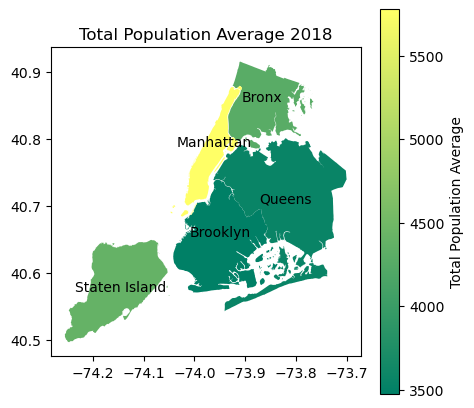

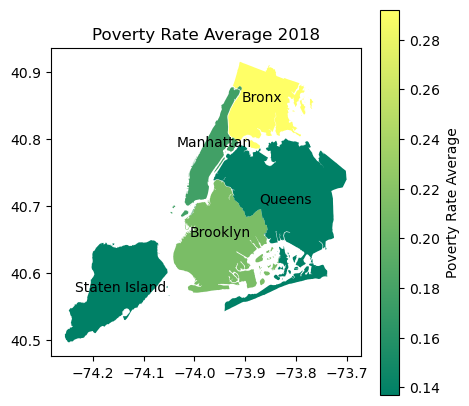

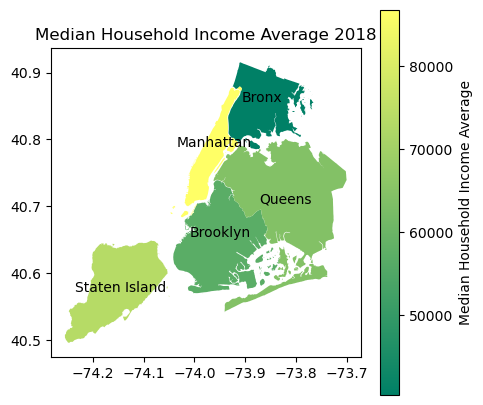

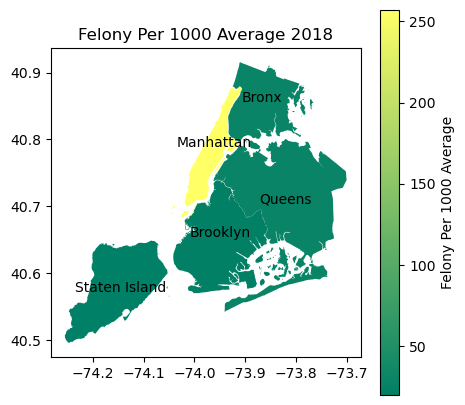

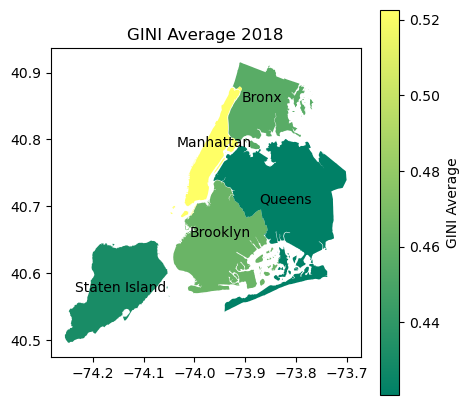

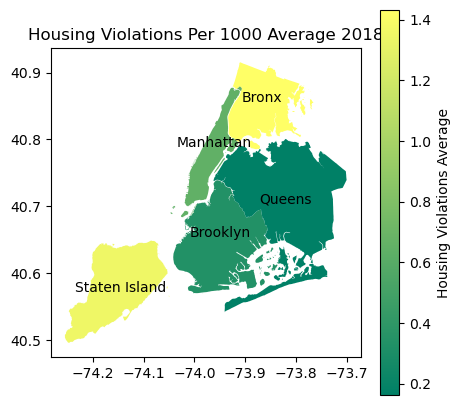

In [72]:
avgby2018 = year18[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000",'City']].groupby('City').mean()
avgby2018['boro_code'] = [2,3,1,4,5]
display(avgby2018)

avg2018 = pd.merge(newyorkborough, avgby2018, on='boro_code')
avg2018
#print("Type of DataFrame : ", type(avg2018), avg2018.shape[0])



fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='Total_Population', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Total Population Average"})
ax.set_title("Total Population Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='Poverty_Rate', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Poverty Rate Average"})
ax.set_title("Poverty Rate Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='MED_HH_Income', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Median Household Income Average"})
ax.set_title("Median Household Income Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='Felony_Per_1000', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Felony Per 1000 Average"})
ax.set_title("Felony Per 1000 Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='GINI', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "GINI Average"})
ax.set_title("GINI Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')

fig, ax = plt.subplots(figsize=(5,5))
avg2018.plot(column='Housing_Violations_Per_1000', ax=ax, cmap='summer', legend= True, legend_kwds={"label": "Housing Violations Average"})
ax.set_title("Housing Violations Per 1000 Average 2018")

avg2018['coords'] = avg2018['geometry'].apply(lambda x: x.representative_point().coords[:])
avg2018['coords'] = [coords[0] for coords in avg2018['coords']]
for idx, row in avg2018.iterrows():
   plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center', color='black')